# Assignment 2 - AutoML

Name: Deepthi Nasika

NUID: 002474582

# Abstract

The goal is to develop a reliable model to predict the profit for the Global Superstore dataset.In this dataset, profit is the dependent variable, while all other variables serve as independent variables. Initially, key factors affecting profit should be selected. A model for profit prediction should be formulated using linear regression. This model should be applied to the Global Superstore dataset to test the model. Through data analysis and testing, it can be concluded that the linear regression model is capable of predicting and analyzing profit to a certain degree. However, the prediction accuracy of the algorithm could be further enhanced by employing more sophisticated machine learning techniques.

# License

MIT License

Copyright (c) 2024 Deepthi-Nasika

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# Dataset

The dataset contains information about a global superstore which include various attributes related to sales transactions, customer orders, and shipping details. The dataset contains both numeric and categorical variables.

Here is the description of columns present in the dataset:

1. category: The category of products sold in the superstore.
2. city: The city where the order was placed.
3. country: The country in which the superstore is located.
4. customer_id: A unique identifier for each customer.
5. customer_name: The name of the customer who placed the order.
6. discount: The discount applied to the order.
7. market: The market or region where the superstore operates.
8. order_date: The date when the order was placed.
9. order_id: A unique identifier for each order.
10. order_priority: The priority level of the order.
11. product_id: A unique identifier for each product.
12. product_name: The name of the product.
13. profit: The profit generated from the order.
14. quantity: The quantity of products ordered.
15. region: The region where the order was placed.
16. row_id: A unique identifier for each row in the dataset.
17. sales: The total sales amount for the order.
18. segment: The customer segment (e.g., consumer, corporate, or home office).
19. ship_date: The date when the order was shipped.
20. ship_mode: The shipping mode used for the order.
21. shipping_cost: The cost of shipping for the order.
22. state: The state or region within the country.
23. sub_category: The sub-category of products within the main category.
24. year: The year in which the order was placed.
25. market2: Another column related to market information.
26. weeknum: The week number when the order was placed.

# Importing required libraries & H2O initialization

Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.

We are initializing H2O in the following steps.

In [19]:
!pip install eli5
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install simplejson
!pip install scikit-learn
!pip install --upgrade distutils

ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [20]:
!pip install -f http://h2o-release.s3.amazonaws.com/h20/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h20/latest_stable_Py.html


In [21]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import simplejson as json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style="darkgrid", font_scale=1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [22]:
min_mem_size=6
run_time=222

In [23]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [24]:
port_no = random.randint(5555, 55555)

try:
    h2o.init(strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no)
except:
    logging.critical('h2o.init')
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:25730..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7n1o7xtm
  JVM stdout: /tmp/tmp7n1o7xtm/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7n1o7xtm/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:25730
Connecting to H2O server at http://127.0.0.1:25730 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_up3h05
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:25730
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

# Importing data

Once H2O is initialized, in the below code we are importing the data into a h2o dataframe.

In [25]:
# Importing the processed data into h2o dataframe
url = "https://raw.githubusercontent.com/Deepthi-Nasika/DSEMT_Assignments/main/Data/dataset_superstore.csv"
encoded_url = "https://raw.githubusercontent.com/Deepthi-Nasika/DSEMT_Assignments_002474582/main/Data/dataset_superstore_encoded.csv"

df = h2o.import_file(path = encoded_url)
data = pd.read_csv(url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [26]:
data.head()

Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market        Order.Date        Order.ID Order.Priority  ...  \
0       0.0     US  07-01-2011 00:00  CA-2011-130813           High  ...   
1       0.0     US  21-01-2011 00:00  CA-2011-148614         Medium  ...   
2       0.0     US  05-08-2011 00:00  CA-2011-118962         Medium  ...   
3       0.0     US  05-08-2011 00:00  CA-2011-118962         Medium  ...   
4       0.0     US  29-09-2011 00:00  CA-2011-146969           High  ...   

  Sales   Segment         Ship.Date       Ship.Mode Shipping.Cost       State  \
0    19  Consumer  09-01-2011 00:00    Second Class          4.37  California   
1    19  Consumer  26-01-2011 00:00  Standard Class          0.94  California   
2    21  Consumer  09-08-2011 00:00  Standard Class          1.81  California   
3   111  Consumer  09-08-2011 00:00  Standard Class          4.59  California   
4     6  Consumer  03-10-2011 00:00  Standard Class          1.32  California   

   Sub.Category  Year        Market2 weeknum  
0         Paper  2011  North America       2  
1         Paper  2011  North America       4  
2         Paper  2011  North America      32  
3         Paper  2011  North America      32  
4         Paper  2011  North America      40  

[5 rows x 26 columns]

# Studying the data

In [27]:
data.describe()

Discount        Profit      Quantity       Row.ID         Sales  \
count  51290.000000  51290.000000  51290.000000  51290.00000  51290.000000   
mean       0.142908     28.610982      3.476545  25645.50000    246.498440   
std        0.212280    174.340972      2.278766  14806.29199    487.567175   
min        0.000000  -6599.978000      1.000000      1.00000      0.000000   
25%        0.000000      0.000000      2.000000  12823.25000     31.000000   
50%        0.000000      9.240000      3.000000  25645.50000     85.000000   
75%        0.200000     36.810000      5.000000  38467.75000    251.000000   
max        0.850000   8399.976000     14.000000  51290.00000  22638.000000   

       Shipping.Cost          Year       weeknum  
count   51290.000000  51290.000000  51290.000000  
mean       26.375818   2012.777208     31.287112  
std        57.296810      1.098931     14.429795  
min         0.002000   2011.000000      1.000000  
25%         2.610000   2012.000000     20.000000  
50%         7.790000   2013.000000     33.000000  
75%        24.450000   2014.000000     44.000000  
max       933.570000   2014.000000     53.000000

In [28]:
df.types

{'Category': 'int',
 'City': 'int',
 'Country': 'int',
 'Customer.ID': 'int',
 'Customer.Name': 'int',
 'Discount': 'int',
 'Market': 'int',
 'Order.Date': 'int',
 'Order.ID': 'int',
 'Order.Priority': 'int',
 'Product.ID': 'int',
 'Product.Name': 'int',
 'Profit': 'int',
 'Quantity': 'int',
 'Region': 'int',
 'Row.ID': 'int',
 'Sales': 'int',
 'Segment': 'int',
 'Ship.Date': 'int',
 'Ship.Mode': 'int',
 'Shipping.Cost': 'int',
 'State': 'int',
 'Sub.Category': 'int',
 'Year': 'int',
 'Market2': 'int',
 'weeknum': 'int'}

In [29]:
df.shape

(51290, 26)

In [30]:
pct_rows = 0.80
df_train, df_test = df.split_frame([pct_rows])

In [31]:
print(df_train.shape)
print(df_test.shape)

(41005, 26)
(10285, 26)


In [32]:
X=df.columns
print(X)

['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name', 'Discount', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority', 'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID', 'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State', 'Sub.Category', 'Year', 'Market2', 'weeknum']


In [33]:
y_numeric = 'Profit'
X.remove(y_numeric)
print(X)

['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name', 'Discount', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority', 'Product.ID', 'Product.Name', 'Quantity', 'Region', 'Row.ID', 'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State', 'Sub.Category', 'Year', 'Market2', 'weeknum']


# H2O AutoML Execution

Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time.

In [34]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [35]:
# Pass the data through H2oAutoML
aml.train(x=X, y=y_numeric, training_frame=df_train)

AutoML progress: |
04:21:38.12: _train param, Dropping bad and constant columns: [Discount]

██
04:21:44.50: _train param, Dropping bad and constant columns: [Discount]

█
04:21:45.608: _train param, Dropping bad and constant columns: [Discount]

██████
04:22:06.806: _train param, Dropping unused columns: [Discount]

█
04:22:10.288: _train param, Dropping bad and constant columns: [Discount]
04:22:11.648: _train param, Dropping bad and constant columns: [Discount]

████
04:22:27.343: _train param, Dropping bad and constant columns: [Discount]

██
04:22:31.667: _train param, Dropping bad and constant columns: [Discount]


04:22:34.845: _train param, Dropping bad and constant columns: [Discount]

█
04:22:38.475: _train param, Dropping unused columns: [Discount]

█
04:22:40.83: _train param, Dropping unused columns: [Discount]

█
04:22:42.700: _train param, Dropping bad and constant columns: [Discount]
04:22:43.662: _train param, Dropping bad and constant columns: [Discount]

█████
04:23:

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240220_42136


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  --------
Stacking strategy                     blending
Number of base models (used / total)  6/8
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  1/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 7617.172967031892
RMSE: 87.27641701531915
MAE: 32.37906796862075
RMSLE: NaN
Mean Residual Deviance: 7617.172967031892
R^2: 0.7272756068692472
Null degrees of freedom: 10054
Residual degrees of freedom: 10048
Null deviance: 280921063.0204061
Residual deviance: 76590674.18350567
AIC: 118424.05851595053

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 11889.759911755908
RMSE: 109.04017567738924
MAE: 42.55245786519221
RMSLE: NaN
Mean Residual Deviance: 11889.759911755908
R^2: 0.5497716694936945
Null degrees of freedom: 4210
Residual degrees of freedom: 4204
Null deviance: 111307024.77081282
Residual deviance: 50067778.988404125
AIC: 51479.935834942306

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Interpreting the above results

MAE: The mean absolute error (MAE) is the average absolute difference between the target values and the predicted values. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSE: The root-mean-square error metric is a frequently used measure of the differences between the values predicted by a model or an estimator and the values observed. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSLE: The root-mean-squared logarithmic error metric is similar to RMSE, except that it uses the natural logarithm of the predicted and actual values plus 1. RMSLE penalizes under-prediction more heavily than over-prediction. It can also be a good metric when you don't want to penalize differences for large prediction values more heavily than for small prediction values. This metric ranges from zero to infinity; a lower value indicates a higher quality model. The RMSLE evaluation metric is returned only if all label and predicted values are non-negative.

r^2: r squared (r^2) is the square of the Pearson correlation coefficient between the labels and predicted values. This metric ranges between zero and one; a higher value indicates a higher quality model.

MAPE: Mean absolute percentage error (MAPE) is the average absolute percentage difference between the labels and the predicted values. This metric ranges between zero and infinity; a lower value indicates a higher quality model.

K-fold cross-validation is used to validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split.

Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the h2o.automl() function for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance.

In [36]:
print(aml.leaderboard)

model_id                                                   rmse      mse      mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240220_42136     109.04   11889.8  42.5525      nan                   11889.8
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_42136  109.159  11915.6  42.7263      nan                   11915.6
StackedEnsemble_BestOfFamily_4_AutoML_1_20240220_42136  109.31   11948.6  42.7051      nan                   11948.6
StackedEnsemble_AllModels_3_AutoML_1_20240220_42136     109.437  11976.4  42.6482      nan                   11976.4
StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_42136  109.541  11999.2  42.307       nan                   11999.2
StackedEnsemble_AllModels_2_AutoML_1_20240220_42136     109.901  12078.3  42.5001      nan                   12078.3
GBM_4_AutoML_1_20240220_42136                           110.647  12242.7  42.7153      nan                   12242.7
GBM_3_AutoML_1_20240220_42136                           111.643 

In [37]:
df_pd = pd.read_csv("https://raw.githubusercontent.com/Deepthi-Nasika/DSEMT_Assignments_002474582/main/Data/dataset_superstore_encoded.csv")

In [38]:
# Assuming df_test is your test dataset and it's already been uploaded into H2O frame
df_test_h2o = h2o.H2OFrame(df_test)

# Get the leader model (the best model) from the AutoML run
best_model = aml.leader

# Then use the model_performance method on this best model with the test dataset
performance = best_model.model_performance(df_test_h2o)

# Now you can print or inspect the performance object
print(performance)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 20252.84965194976
RMSE: 142.31250701168102
MAE: 44.62868423019011
RMSLE: NaN
Mean Residual Deviance: 20252.84965194976
R^2: 0.310557844225133
Null degrees of freedom: 10284
Residual degrees of freedom: 10278
Null deviance: 302130261.8460766
Residual deviance: 208300558.6703033
AIC: 131190.14796395475


# Analysing relation between all variables

VIF stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Indicate which variables to compute VIF
num_cols = df_pd.select_dtypes(include=[np.number])
#Compute VIF
vif = pd.DataFrame()
vif["Variables"] = num_cols.columns
vif["VIF"] = [variance_inflation_factor(num_cols.values, i) for i in range(num_cols.shape[1])]
vif

Variables         VIF
0         Category   37.576172
1             City    4.672175
2          Country    7.258570
3      Customer.ID  461.052870
4    Customer.Name  462.103857
5         Discount         NaN
6           Market  101.545963
7       Order.Date    4.709075
8         Order.ID    4.755175
9   Order.Priority    6.105794
10      Product.ID   51.716221
11    Product.Name    4.612224
12          Profit    1.369421
13        Quantity    3.900298
14          Region    4.474479
15          Row.ID    7.317354
16           Sales    3.830453
17         Segment    1.762401
18       Ship.Date    4.656957
19       Ship.Mode    6.483960
20   Shipping.Cost    3.281427
21           State    4.753427
22    Sub.Category    8.566650
23            Year   57.110159
24         Market2   94.386336
25         weeknum    5.816273

VIF for 'Category','Customer.ID','Customer.Name','Discount', 'Market', 'Product.ID', 'Year' and 'Market2' is greater than 10. 'Market' and 'Market2' specify the same thing. 'Product.ID', 'Customer.ID', 'Customer.Name' are the unique identifiers and adds no value to train the model. Dropping the columns = ['Category', 'Customer.ID', 'Customer.Name', 'Discount', 'Market', 'Product.ID', 'Year']



In [40]:
df_pd.columns = df_pd.columns.str.replace('.', '_')

Ordinary least squares (OLS) regression is a statistical method of analysis used for multivariate model that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable. Independent variable with the p_value < 0.05 contributes more in the model to predict the target variable.

In [41]:
import statsmodels.formula.api as smf
# Assuming dfpd is the correct DataFrame and all columns are appropriately named
results = smf.ols('Profit ~ City + Country + Order_Date + Order_ID + Order_Priority + Product_Name + Quantity + Region + Row_ID + Sales + Segment + Ship_Date	+ Ship_Mode	+ Shipping_Cost + State + Sub_Category + Market2 + weeknum', data=df_pd).fit()
results_summary = results.summary()
print(results_summary)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     938.2
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        04:25:30   Log-Likelihood:            -3.3014e+05
No. Observations:               51290   AIC:                         6.603e+05
Df Residuals:                   51271   BIC:                         6.605e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         41.0629      4.676      8.


As seen from the OLS summary p-value for 'Order_Date', 'Order_Priority', 'Row_ID', 'Segment', 'Ship_Date', 'Ship_Mode' and 'weeknum' is greater than 0.05. Dropping them will give us a model with all variables whose p-values are less than 0.05.

In [42]:
df1 = df_pd.drop(['Category', 'Customer_ID', 'Customer_Name', 'Discount', 'Market', 'Order_Date', 'Order_Priority', 'Row_ID', 'Product_ID', 'Segment', 'Ship_Date', 'Ship_Mode', 'Year'], axis=1)

In [43]:
df1

City  Country  Order_ID  Product_Name  Profit  Quantity  Region  Sales  \
0      1910      139       722          3736       9         3      12     19   
1      1910      139       920          3569       9         2      12     19   
2      1910      139       572           175       9         3      12     21   
3      1910      139       572          3612      53         2      12    111   
4      1910      139       905          3734       3         1      12      6   
...     ...      ...       ...           ...     ...       ...     ...    ...   
51285  1910      139      3490          3086      22         2      12     69   
51286  1910      139      3490          3275       3         6      12      9   
51287  1910      139      3435          1505       4         2      12     12   
51288  1910      139      4196          3492      33         3      12     90   
51289  1910      139      3706          1494      51         3      12    154   

       Shipping_Cost  State  Sub_Category  Market2  weeknum  
0                  4    192            12        5        2  
1                  0    192            12        5        4  
2                  1    192            12        5       32  
3                  4    192            12        5       32  
4                  1    192            12        5       40  
...              ...    ...           ...      ...      ...  
51285              5    192             3        5       49  
51286              0    192             3        5       49  
51287              0    192             3        5       51  
51288             15    192             3        5       52  
51289              9    192             3        5       52  

[51290 rows x 13 columns]

The correlation matrix is simply a table of correlations. Each random variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation.It also tells us if it is directly dependent or inversely by signifying the positive and negative signs.

In [44]:
df1.corr()

City   Country  Order_ID  Product_Name    Profit  Quantity  \
City           1.000000  0.003159  0.012778      0.001324  0.021860  0.022314   
Country        0.003159  1.000000 -0.125585      0.029090 -0.053735 -0.011571   
Order_ID       0.012778 -0.125585  1.000000     -0.017541 -0.084390 -0.065594   
Product_Name   0.001324  0.029090 -0.017541      1.000000  0.004639  0.002443   
Profit         0.021860 -0.053735 -0.084390      0.004639  1.000000  0.104428   
Quantity       0.022314 -0.011571 -0.065594      0.002443  0.104428  1.000000   
Region         0.085849  0.143008 -0.159473      0.009545  0.003382  0.127454   
Sales          0.007091 -0.046146 -0.050676      0.002066  0.485172  0.313580   
Shipping_Cost  0.003557 -0.047266 -0.037003      0.005773  0.354604  0.272601   
State          0.231460 -0.111766 -0.017373      0.004999  0.010466  0.040073   
Sub_Category  -0.000884  0.003743 -0.000077      0.128905 -0.040282  0.003890   
Market2        0.092239  0.414575 -0.125389      0.022169 -0.014816  0.074414   
weeknum        0.004628  0.021118 -0.005973     -0.000340 -0.000190  0.020839   

                 Region     Sales  Shipping_Cost     State  Sub_Category  \
City           0.085849  0.007091       0.003557  0.231460     -0.000884   
Country        0.143008 -0.046146      -0.047266 -0.111766      0.003743   
Order_ID      -0.159473 -0.050676      -0.037003 -0.017373     -0.000077   
Product_Name   0.009545  0.002066       0.005773  0.004999      0.128905   
Profit         0.003382  0.485172       0.354604  0.010466     -0.040282   
Quantity       0.127454  0.313580       0.272601  0.040073      0.003890   
Region         1.000000  0.040667       0.035142 -0.002840      0.018594   
Sales          0.040667  1.000000       0.768066  0.020374      0.017167   
Shipping_Cost  0.035142  0.768066       1.000000  0.017052      0.012203   
State         -0.002840  0.020374       0.017052  1.000000      0.010002   
Sub_Category   0.018594  0.017167       0.012203  0.010002      1.000000   
Market2        0.040100 -0.049657      -0.051456 -0.018241     -0.006086   
weeknum        0.021340  0.001947       0.005331 -0.020342     -0.002007   

                Market2   weeknum  
City           0.092239  0.004628  
Country        0.414575  0.021118  
Order_ID      -0.125389 -0.005973  
Product_Name   0.022169 -0.000340  
Profit        -0.014816 -0.000190  
Quantity       0.074414  0.020839  
Region         0.040100  0.021340  
Sales         -0.049657  0.001947  
Shipping_Cost -0.051456  0.005331  
State         -0.018241 -0.020342  
Sub_Category  -0.006086 -0.002007  
Market2        1.000000  0.056117  
weeknum        0.056117  1.000000

Representing the same matrix in form of heatmap where shades of blue signify inverse relation and shades of red signify direct relation.

Text(0.5, 1.0, 'Variable Correlation')

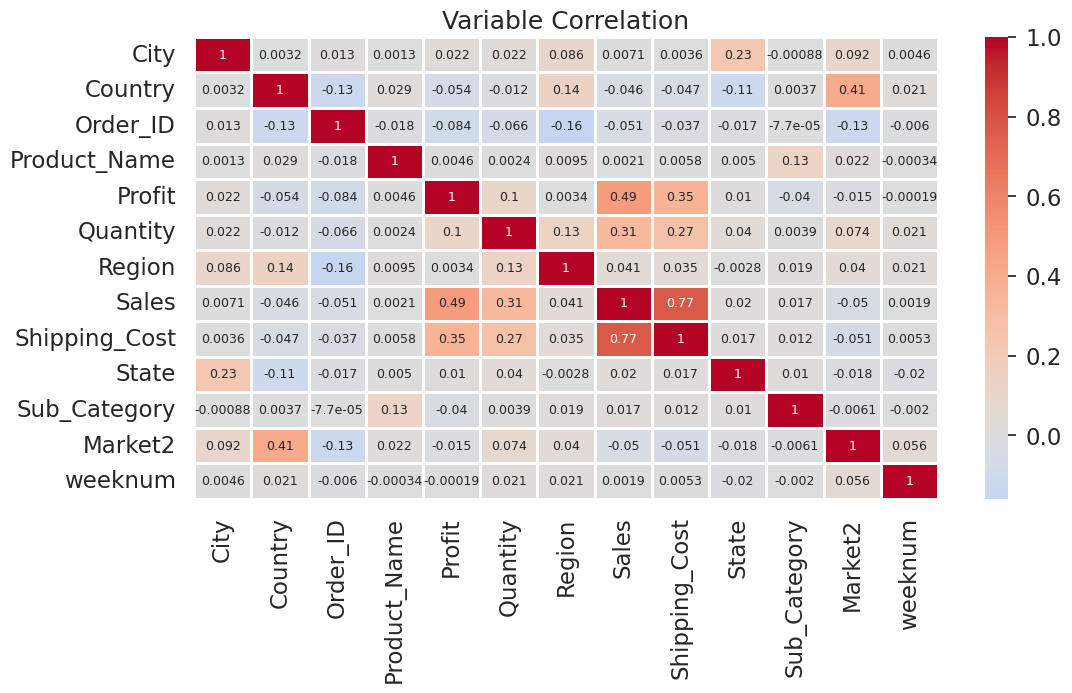

In [45]:
# Representing matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(12,6))

sns.heatmap(df1.corr(), center=0, linewidth=0.8, cmap='coolwarm', annot=True, annot_kws={"size":9})
plt.title('Variable Correlation')

Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.

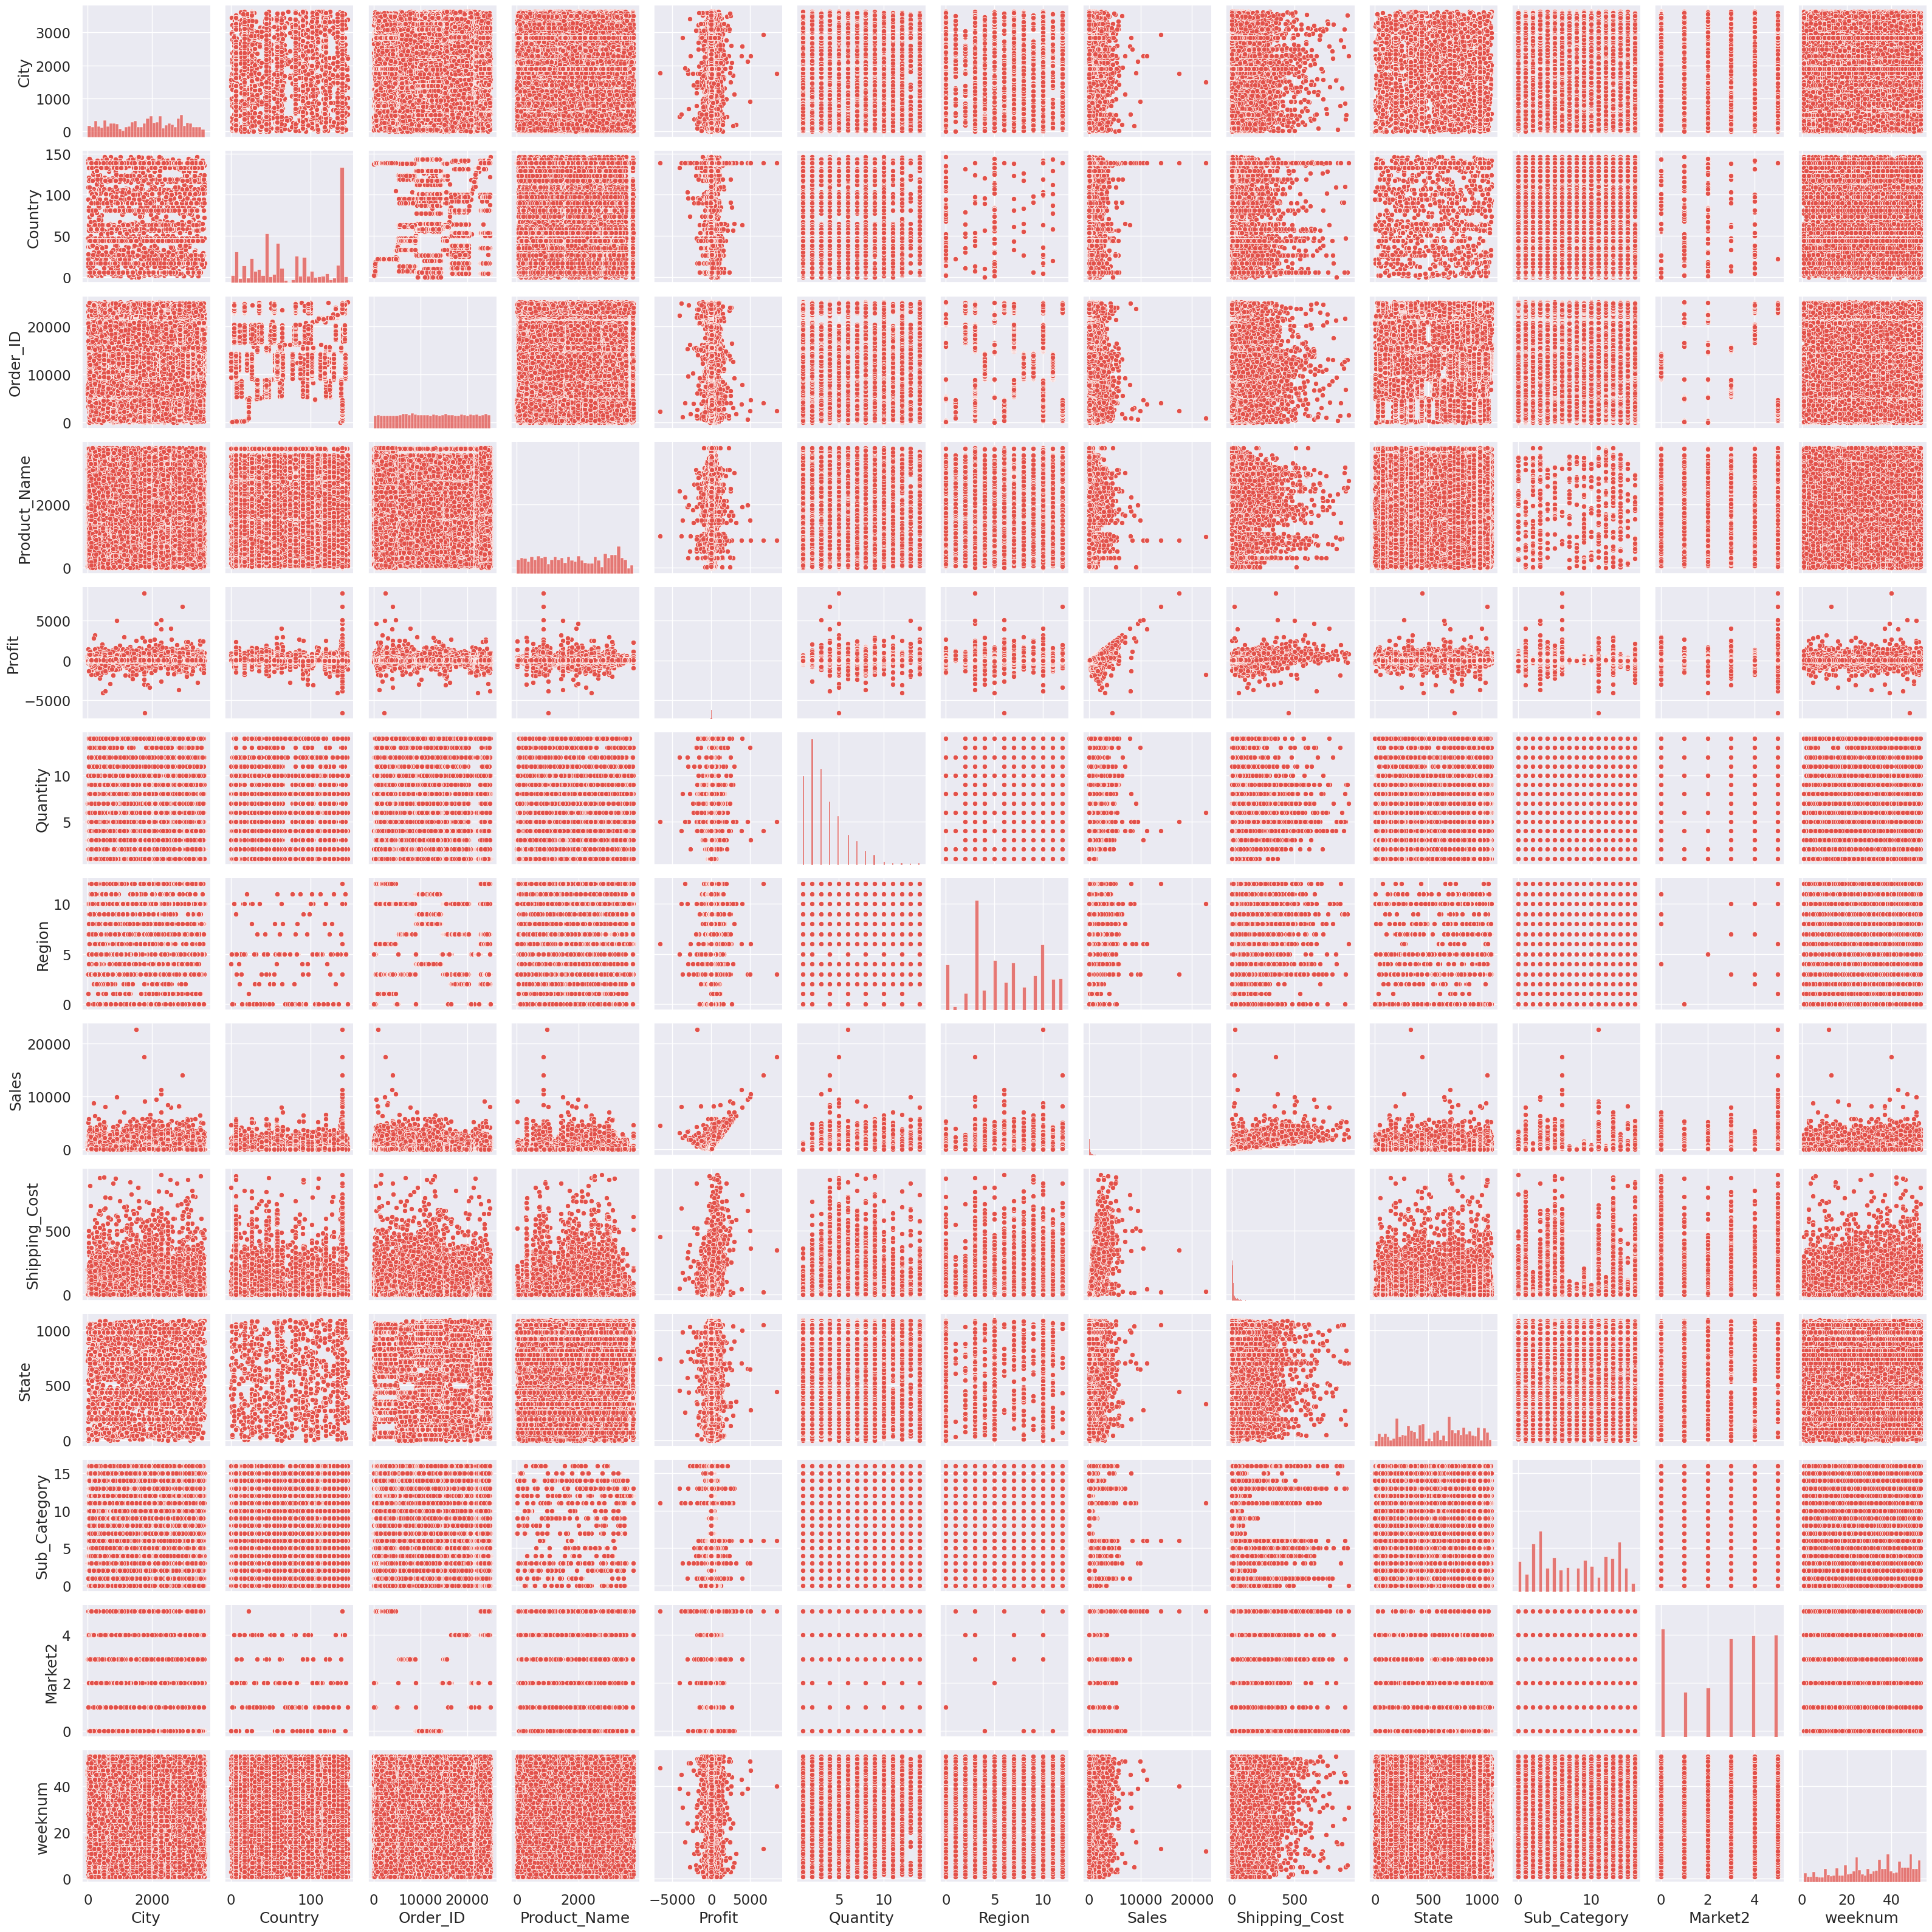

In [46]:
sns.pairplot(df1)

# H2O AutoML Reexecution on new model

Dropping the variables that are not significant for determining Profit. Passing this new model again through H20AutoML. Here, we are repeating the entire process exactly as above whilst ignoring the unecessary features.

In [47]:
df2=df.drop(['Category', 'Customer.ID', 'Customer.Name', 'Discount', 'Market', 'Order.Date', 'Order.Priority', 'Product.ID', 'Row.ID', 'Segment', 'Ship.Date', 'Ship.Mode', 'Year', 'Market2', 'weeknum'],axis=1)

In [48]:
df2_train,df2_test = df2.split_frame([pct_rows])

In [49]:
X2=df2.columns
print(X2)

['City', 'Country', 'Order.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Sales', 'Shipping.Cost', 'State', 'Sub.Category']


In [50]:
# Seperate dependent variable from independent variable
y2_numeric = 'Profit'
X2.remove(y2_numeric)
print(X2)

['City', 'Country', 'Order.ID', 'Product.Name', 'Quantity', 'Region', 'Sales', 'Shipping.Cost', 'State', 'Sub.Category']


In [51]:
aml2 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [52]:
aml2.train(x=X2, y=y2_numeric, training_frame=df2_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_2_AutoML_2_20240220_42714


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       7/12
# GBM base models (used / total)           2/5
# XGBoost base models (used / total)       3/3
# DRF base models (used / total)           2/2
# GLM base models (used / total)           0/1
# DeepLearning base models (used / total)  0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 4751.7876127803
RMSE: 68.93321124668645
MAE: 31.587096577404985
RMSLE: NaN
Mean Residual Deviance: 4751.7876127803
R^2: 0.8541752080044792
Null degrees of freedom: 10017
Residual degrees of freedom: 10010
Null deviance: 326443812.919634
Residual deviance: 47603408.30483305
AIC: 113263.00707990679

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 17504.966520458136
RMSE: 132.30633590443858
MAE: 42.95340513005789
RMSLE: NaN
Mean Residual Deviance: 17504.966520458136
R^2: 0.4353886017492883
Null degrees of freedom: 41148
Residual degrees of freedom: 41141
Null deviance: 1275804054.7214096
Residual deviance: 720311867.3503318
AIC: 518829.40590736485

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     42.9539      1.46133      42.1223       42.9052       43.2649       41.2905       45.1864
mean_residual_deviance  17503.6      5017.33      13588.3       17070.5       20067         12190.6       24601.3
mse                     17503.6      5017.33      13588.3       17070.5       20067         12190.6       24601.3
null_deviance           2.55161e+08  6.25706e+07  2.29207e+08   2.06894e+08   3.3624e+08    1.96688e+08   3.06775e+08
r2                      0.434789     0.0919251    0.509953      0.326787      0.503372      0.491564      0.342269
residual_deviance       1.44062e+08  4.13057e+07  1.1232e+08    1.39278e+08   1.66958e+08   9.99997e+07   2.01756e+08
rmse                    131.228      18.7999      116.569       130.654       141.658       110.411       156.848
rmsle                   nan          0            nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [53]:
aml2_leaderboard = aml2.leaderboard
print(aml2_leaderboard)

model_id                                                   rmse      mse      mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_2_20240220_42714     132.306  17505    42.9534      nan                   17505
StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_42714  132.377  17523.6  42.9278      nan                   17523.6
StackedEnsemble_AllModels_1_AutoML_2_20240220_42714     133.004  17690.1  42.6281      nan                   17690.1
GBM_3_AutoML_2_20240220_42714                           133.538  17832.4  43.9895      nan                   17832.4
StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_42714  134.428  18070.9  42.8943      nan                   18070.9
GBM_5_AutoML_2_20240220_42714                           136.206  18552    45.4521      nan                   18552
GBM_2_AutoML_2_20240220_42714                           136.219  18555.7  44.9219      nan                   18555.7
GBM_4_AutoML_2_20240220_42714                           136.86   187

In [54]:
# Assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml2_leaderboard_df2 = aml2_leaderboard.as_data_frame()
models_dict={}
for m in aml2_leaderboard_df2['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml2_leaderboard_df2['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_AllModels_2_AutoML_2_20240220_42714': 0,
 'StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_42714': 1,
 'StackedEnsemble_AllModels_1_AutoML_2_20240220_42714': 2,
 'GBM_3_AutoML_2_20240220_42714': 3,
 'GLM_1_AutoML_2_20240220_42714': 17}

In [55]:
print(model_index)
best_model1 = h2o.get_model(aml2.leaderboard[model_index,'model_id'])

3


In [56]:
best_model1.algo

'gbm'

In [57]:
# Assuming df_test is your test dataset and it's already been uploaded into H2O frame
df_test_h2o = h2o.H2OFrame(df_test)

# Get the leader model (the best model) from the AutoML run
best_model = aml2.leader
print(best_model)
# Then use the model_performance method on this best model with the test dataset
performance = best_model.model_performance(df_test_h2o)

# Now you can print or inspect the performance object
print(performance)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_2_AutoML_2_20240220_42714


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       7/12
# GBM base models (used / total)           2/5
# XGBoost base models (used / total)       3/3
# DRF base models (used / total)           2/2
# GLM base models (used / total)           0/1
# DeepLearning base models (used / total)  0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 4751.7876127803
RMSE: 68.93321124668645
MAE: 31.587096577404985
RMSLE: NaN
Mean Residual De

In [58]:
# Print the metalearner model's parameters
print(best_model.metalearner().params)



{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'metalearner_AUTO_StackedEnsemble_AllModels_2_AutoML_2_20240220_42714', 'type': 'Key<Model>', 'URL': '/3/Models/metalearner_AUTO_StackedEnsemble_AllModels_2_AutoML_2_20240220_42714'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'levelone_training_StackedEnsemble_AllModels_2_AutoML_2_20240220_42714', 'type': 'Key<Frame>', 'URL': '/3/Frames/levelone_training_StackedEnsemble_AllModels_2_AutoML_2_20240220_42714'}, 'input': None}, 'validation_frame': {'default': None, 'actual': None, 'input': None}, 'nfolds': {'default': 0, 'actual': 5, 'input': 0}, 'checkpoint': {'default': None, 'actual': None, 'input': None}, 'export_checkpoints_dir': {'default': None, 'actual': None, 'input': None}, 'seed': {'default': -1, 'actual': 17, 'input': -1}

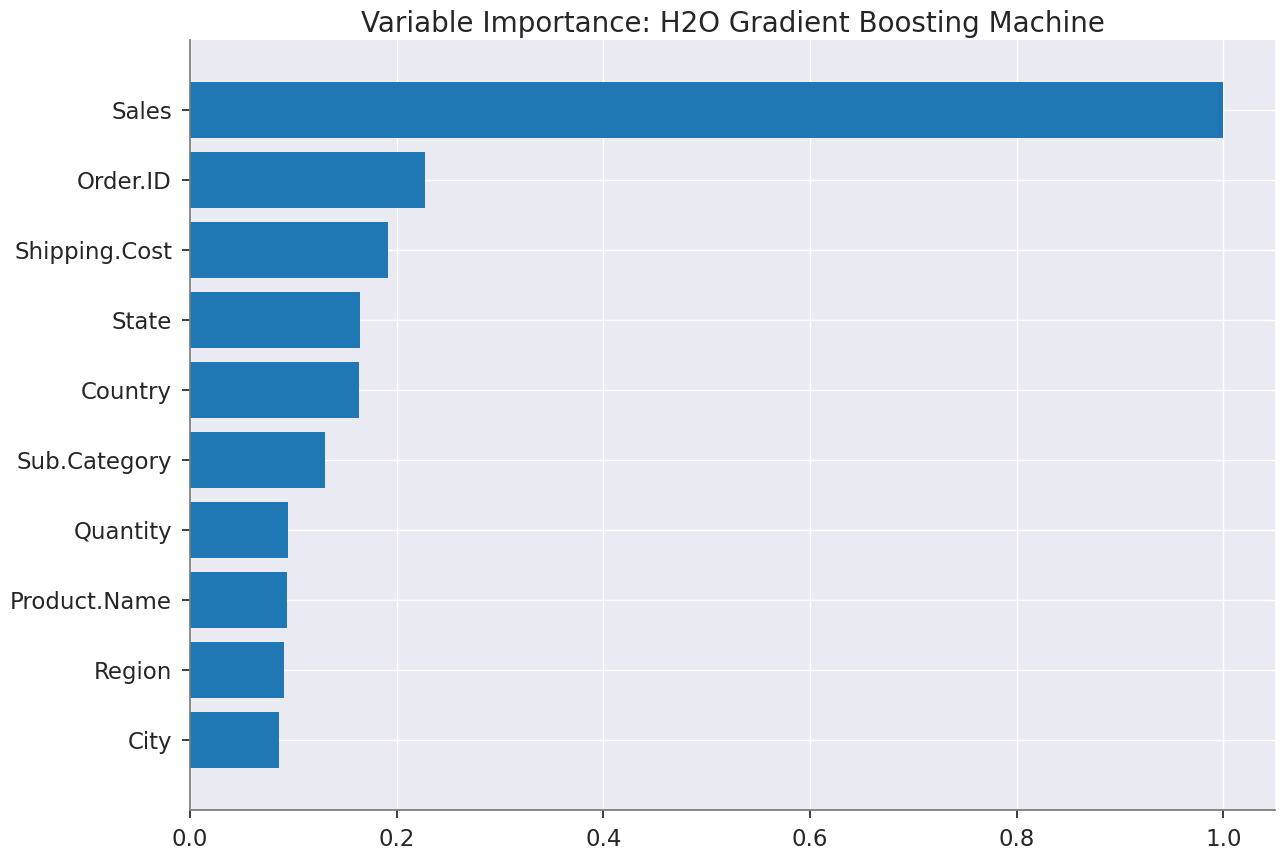

<Figure size 800x550 with 0 Axes>

In [59]:
#plot variables in order of their importance for price prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

17
glm


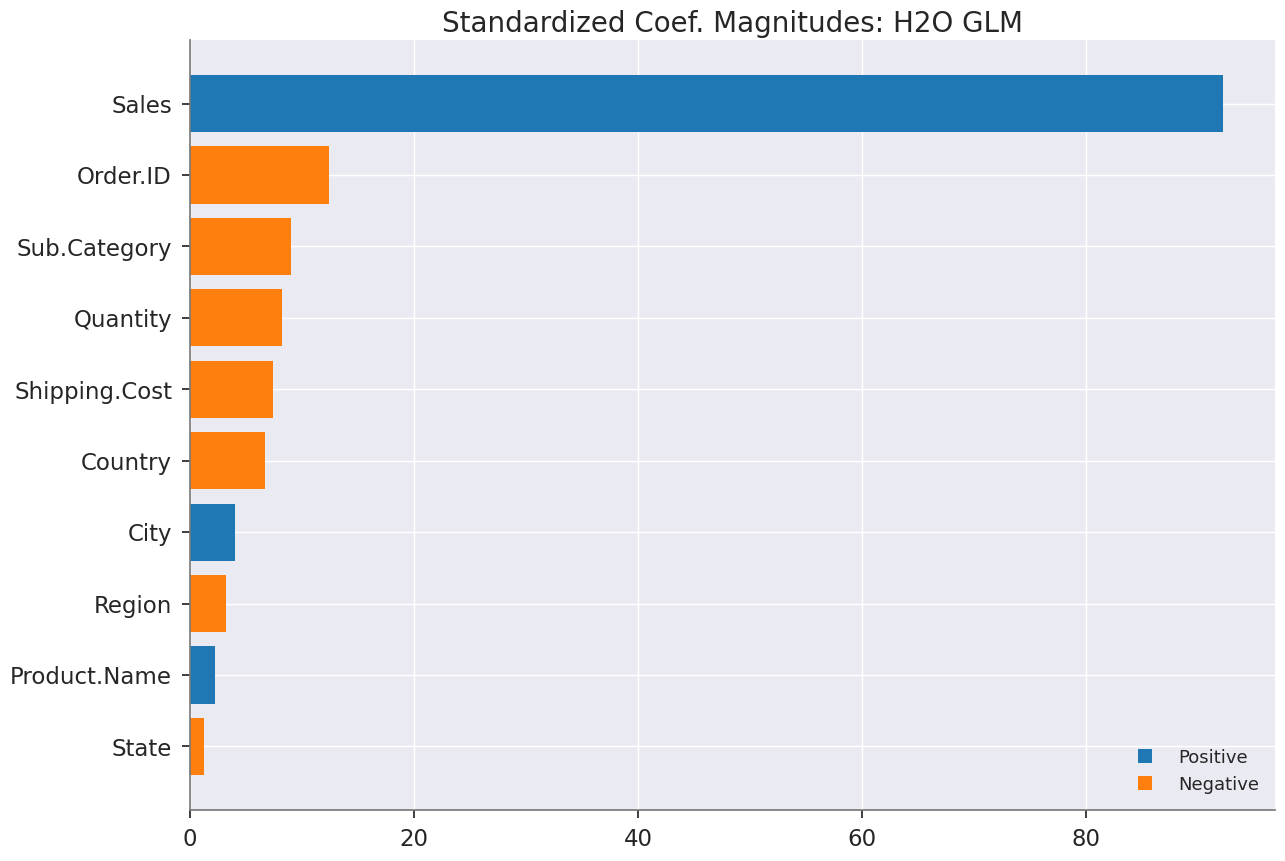

In [60]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml2.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo)
  glm_model1.std_coef_plot()

# Checking if assumptions violated

Checking if the model has violated any assumptions. For linear regression some of the assumptions are:

(1)There needs to be linear relation between the independent and dependent variable.

(2)Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.

(3)Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.

(4)There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.

In [61]:
A=df1.drop(['Profit'], axis=1)
B=df1['Profit']

In [62]:
#Splitting the data
A_train, A_test, b_train, b_test = tts(A,B,test_size=0.2,random_state=42)
print(A_train.columns)

Index(['City', 'Country', 'Order_ID', 'Product_Name', 'Quantity', 'Region',
       'Sales', 'Shipping_Cost', 'State', 'Sub_Category', 'Market2',
       'weeknum'],
      dtype='object')


Here we are checking if the Homoscedasticity (normality of the error distribution) assumption satisfies or not. A normal distribution of errors is expected.

In [63]:
cols1 = ['Sales', 'Shipping_Cost', 'Order_ID', 'Sub_Category', 'Country', 'Quantity', 'City', 'Region', 'Product_Name', 'State']
model1 = sm.OLS(b_train,sm.add_constant(A_train[cols1])).fit()

In [64]:
b_pred = model1.predict(sm.add_constant(A_train[cols1]))

In [65]:
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of residuals = {}".format(mean_residuals))

Mean of residuals = 4.158718386016134e-13


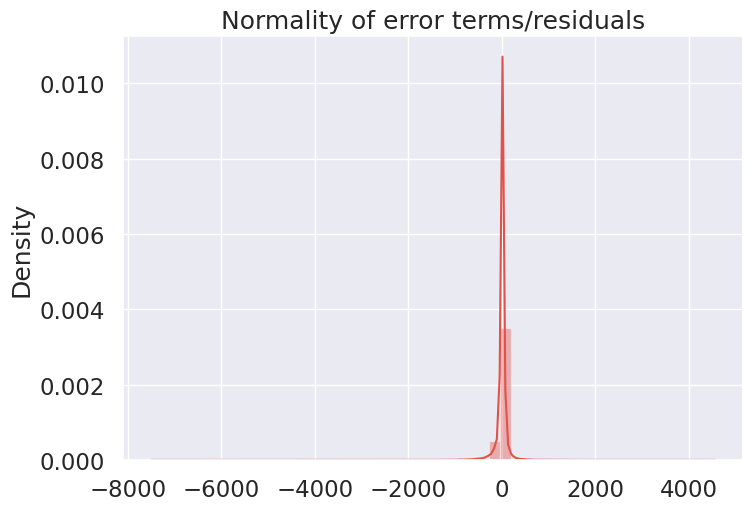

In [66]:
p=sns.distplot(residuals, kde=True)
p=plt.title('Normality of error terms/residuals')

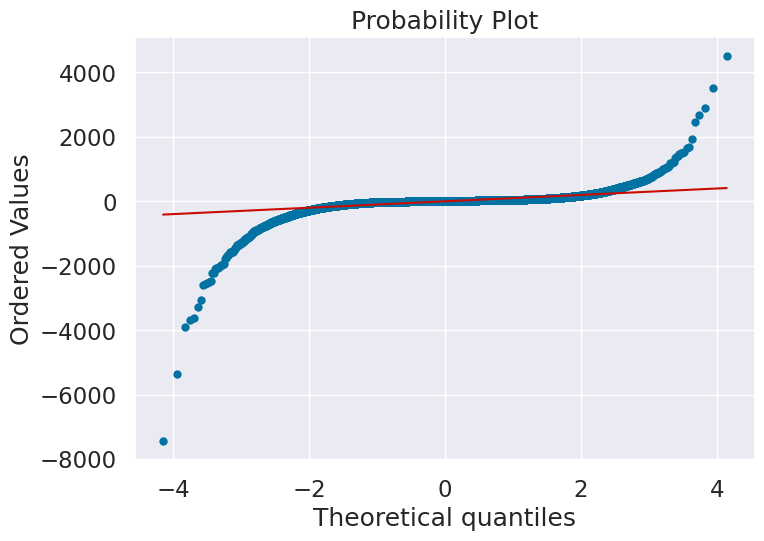

In [67]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Profit', ylabel='Count'>

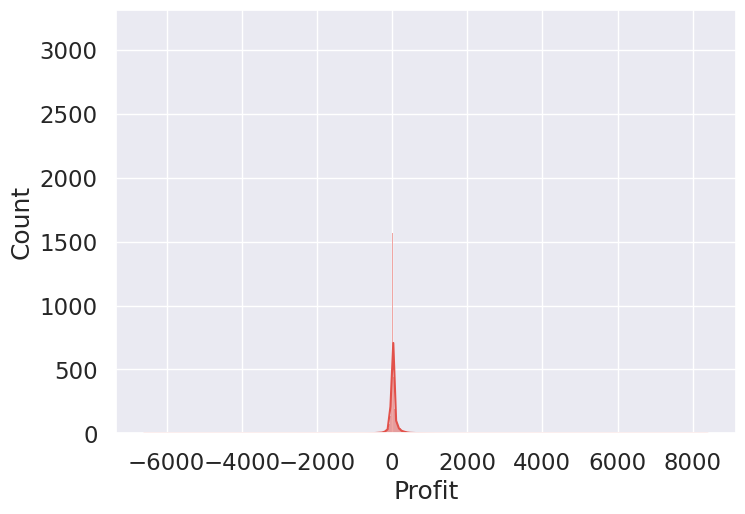

In [68]:
sns.histplot(df_pd.Profit, kde=True)

Ideally for the scatterplot the result should be scattered and it should not have any particular pattern.When the same is plotted as distplot it should follow a bell curve pattern.Both the plots give the expected result so even this assumptions are satisfied.

# Ridge Regularization in H20

The main purpose of regression is to find patterns in this underlying dataset and generalize it to predict the corresponding target value for some new values of independent values. But sometimes target dataset is inflicted with some random noise. Although there may not be error for training set it will give huge errors in predicting the correct target values for test dataset.To avoid this condition regularization is used. Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. For this model, Ridge Regularization is used.

Here, we use H2OGeneralizedLinearEstimator which would enable us to fit a generalized linear model, specified by a response variable, a set of predictors and a description of the error distribution.

In [69]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_= 0, compute_p_values= True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family='gaussian', lambda_ = .001, alpha=0)

In [70]:
house_glm_regularization.train(x = X2, y = y2_numeric, training_frame= df2_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708402878681_44


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  10                            10                             1                       py_13_sid_840e

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 23210.021913657965
RMSE: 152.34835710849646
MAE: 56.814003039308716
RMSLE: NaN
Mean Residual Deviance: 23210.021913657965
R^2: 0.2513757218110285
Null degrees of freedom: 41148
Residual degrees of freedom: 41138
Null deviance: 1275765720.6036088
Residual deviance: 955069191.7251116
AIC: 530443.5191627743

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ------------------
    2024-02-20 04:31:18  0.000 sec   0             1275765720.6036088         31003.565593419255
    2024-02-20 04:31:18  0.065 sec   1                                                            152.34835710849646  23210.021913657965   56.814003039308716  0.2513757218110285

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
Sales          95.3237                1                    0.622671
Order.ID       12.563                 0.131793             0.0820639
Shipping.Cost  9.72003                0.101969             0.0634929
Sub.Category   9.17043                0.096203             0.0599028
Quantity       8.67432                0.0909986            0.0566622
Country        6.74399                0.0707483            0.0440529
City           4.09361                0.0429443            0.0267402
Region         3.21364                0.0337129            0.020992
Product.Name   2.2758                 0.0238744            0.0148659
State          1.30991                0.0137417            0.00855654

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [71]:
# Model details without regularization
house_glm.train(x=X2, y=y2_numeric, training_frame=df2_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708402878681_45


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              10                            10                             1                       py_13_sid_840e

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 23209.9954612893
RMSE: 152.34827029306666
MAE: 56.82918868566727
RMSLE: NaN
Mean Residual Deviance: 23209.9954612893
R^2: 0.2513765750151087
Null degrees of freedom: 41148
Residual degrees of freedom: 41138
Null deviance: 1275765720.6036088
Residual deviance: 955068103.2365935
AIC: 530443.4722653978

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  -----------------  ------------------
    2024-02-20 04:31:18  0.000 sec   0             1275765720.6036088         31003.565593419255
    2024-02-20 04:31:18  0.162 sec   1                                                            152.34827029306666  23209.9954612893     56.82918868566727  0.2513765750151087

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
Sales          95.575                 1                    0.622184
Order.ID       12.5741                0.131562             0.0818558
Shipping.Cost  9.91176                0.103707             0.0645245
Sub.Category   9.18197                0.0960709            0.0597737
Quantity       8.70927                0.091125             0.0566965
Country        6.75036                0.070629             0.0439442
City           4.0983                 0.0428804            0.0266795
Region         3.21683                0.0336577            0.0209413
Product.Name   2.28083                0.0238643            0.014848
State          1.31382                0.0137465            0.00855287

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

From the above results, the accuracy and other related variables were same for both the cases. When dataset was regularized and when dataset was not regularized. This tells that for this specific model regularization does not help.

# Data Report

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   rmse      mse      mae    rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  -------  -------  -------  -------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_2_AutoML_2_20240220_42714     123.053  15142.1  41.8132      nan                   15142.1                1242                   0.078648  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20240220_42714     123.42   15232.5  41.1945      nan                   15232.5                 849                   0.033797  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_42714  124.467  15492.1  41.1817      nan                   15492.1                 591                   0.05182   StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_42714  124.493  15498.5  41.6667      nan                   15498.5                1020                   0.040685  StackedEnsemble
GBM_4_AutoML_2_20240220_42714                           125.174  15668.5  42.0914      nan                   15668.5                2159                   0.021306  GBM
GBM_2_AutoML_2_20240220_42714                           125.614  15778.8  43.3675      nan                   15778.8                4015                   0.01784   GBM
GBM_3_AutoML_2_20240220_42714                           125.93   15858.4  42.7935      nan                   15858.4                2314                   0.02429   GBM
GBM_5_AutoML_2_20240220_42714                           126.68   16047.7  44.207       nan                   16047.7                1978                   0.015986  GBM
StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_42714  127.521  16261.6  43.3191      nan                   16261.6                 752                   0.042017  StackedEnsemble
GBM_1_AutoML_2_20240220_42714                           130.419  17009.1  43.3246      nan                   17009.1                4286                   0.034364  GBM
DRF_1_AutoML_2_20240220_42714                           132.306  17504.8  41.889       nan                   17504.8                3980                   0.018531  DRF
XRT_1_AutoML_2_20240220_42714                           132.575  17576    43.9424      nan                   17576                  2384                   0.007945  DRF
XGBoost_2_AutoML_2_20240220_42714                       133.219  17747.3  46.546       nan                   17747.3                1163                   0.005171  XGBoost
GBM_grid_1_AutoML_2_20240220_42714_model_1              133.268  17760.5  45.6654      nan                   17760.5                1084                   0.013962  GBM
XGBoost_3_AutoML_2_20240220_42714                       133.296  17767.9  45.5271      nan                   17767.9                 801                   0.002654  XGBoost
XGBoost_1_AutoML_2_20240220_42714                       135.368  18324.4  46.7985      nan                   18324.4                1713                   0.006556  XGBoost
XGBoost_grid_1_AutoML_2_20240220_42714_model_1          139.979  19594.2  47.7398      nan                   19594.2                1134                   0.003661  XGBoost
DeepLearning_1_AutoML_2_20240220_42714                  145.588  21195.8  52.5932      nan                   21195.8                1734                   0.003266  DeepLearning
GLM_1_AutoML_2_20240220_42714                           146.079  21339    55.9502      nan                   21339                   179                   0.000328  GLM
XGBoost_grid_1_AutoML_2_20240220_42714_model_2          153.995  23714.6  54.5079      nan                   23714.6                 117                   0.00065   XGBoost
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

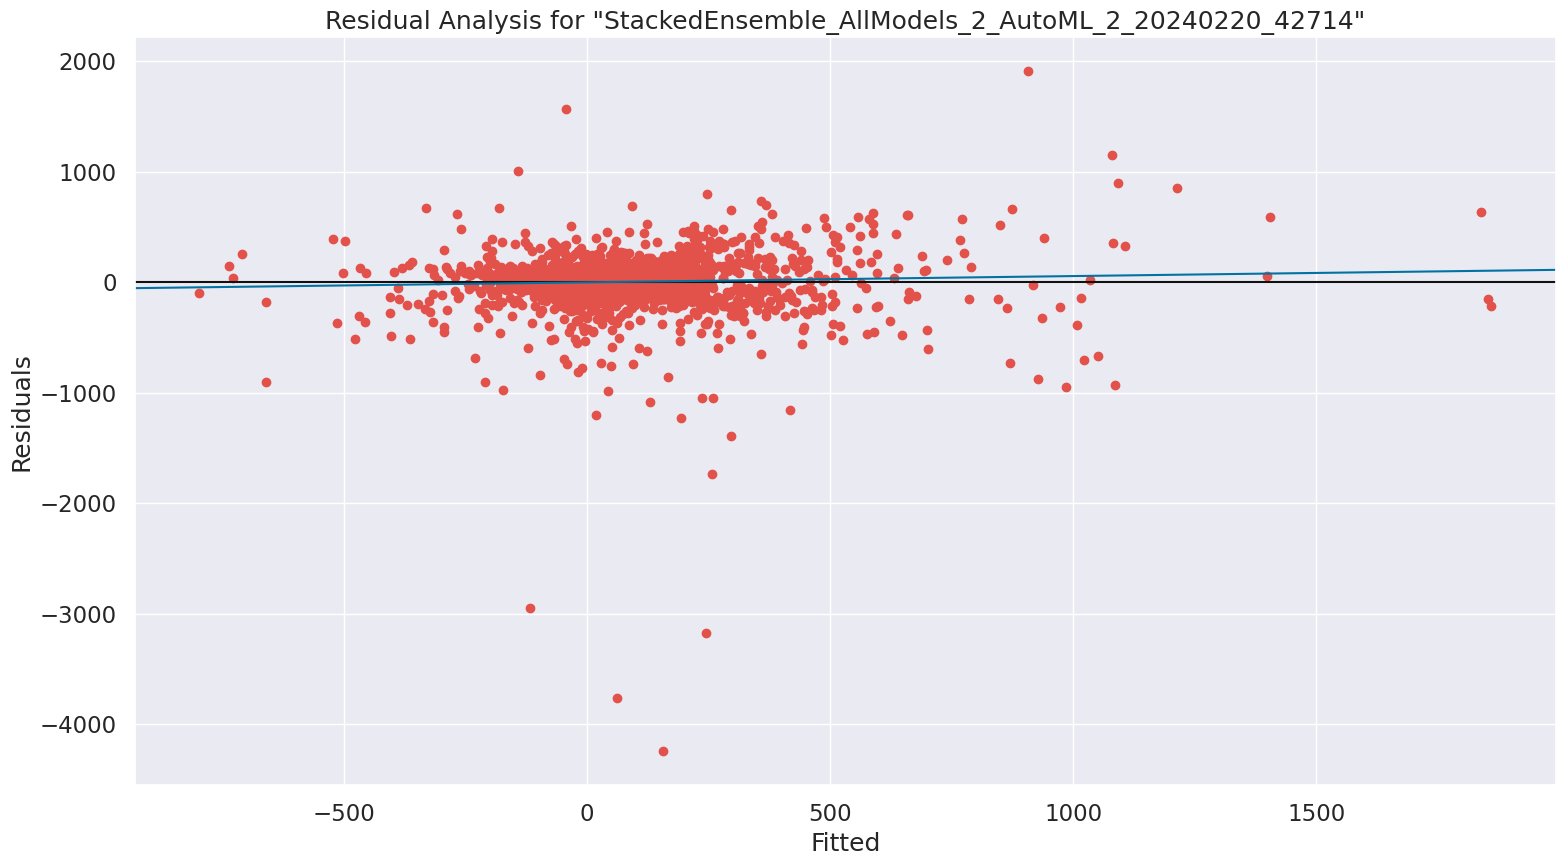

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

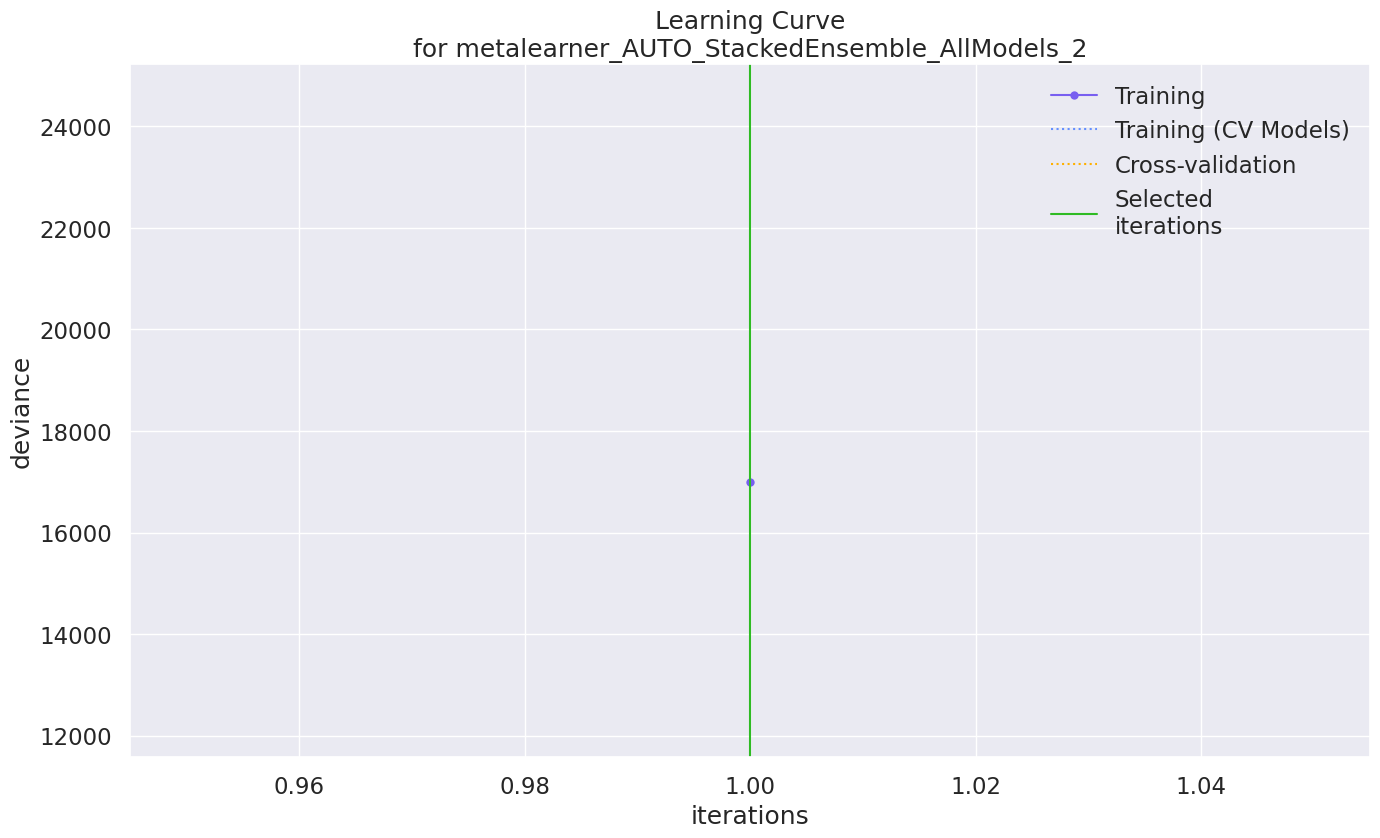

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

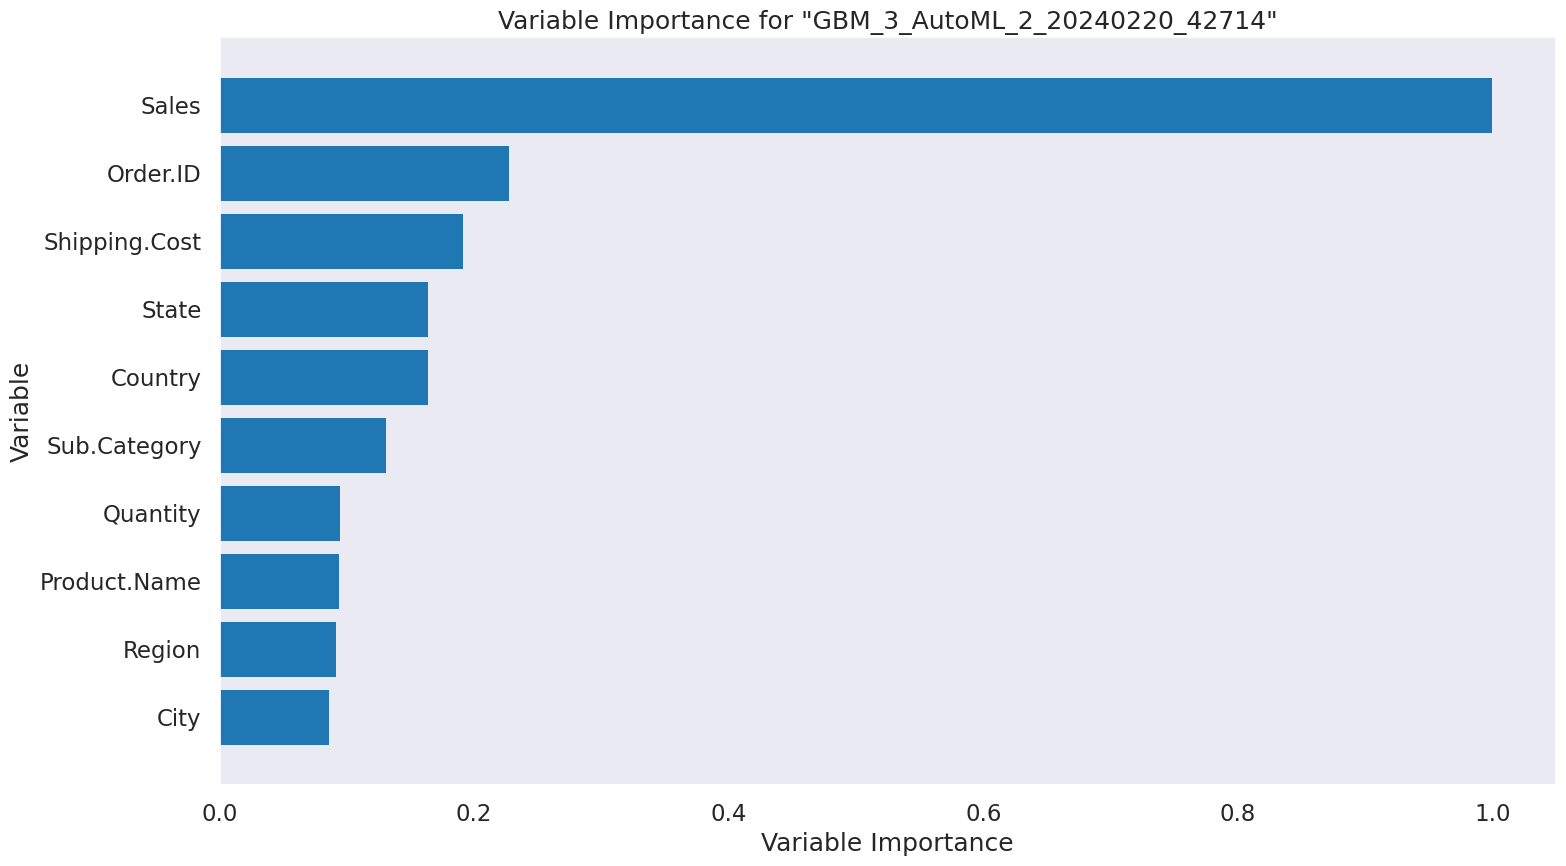

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

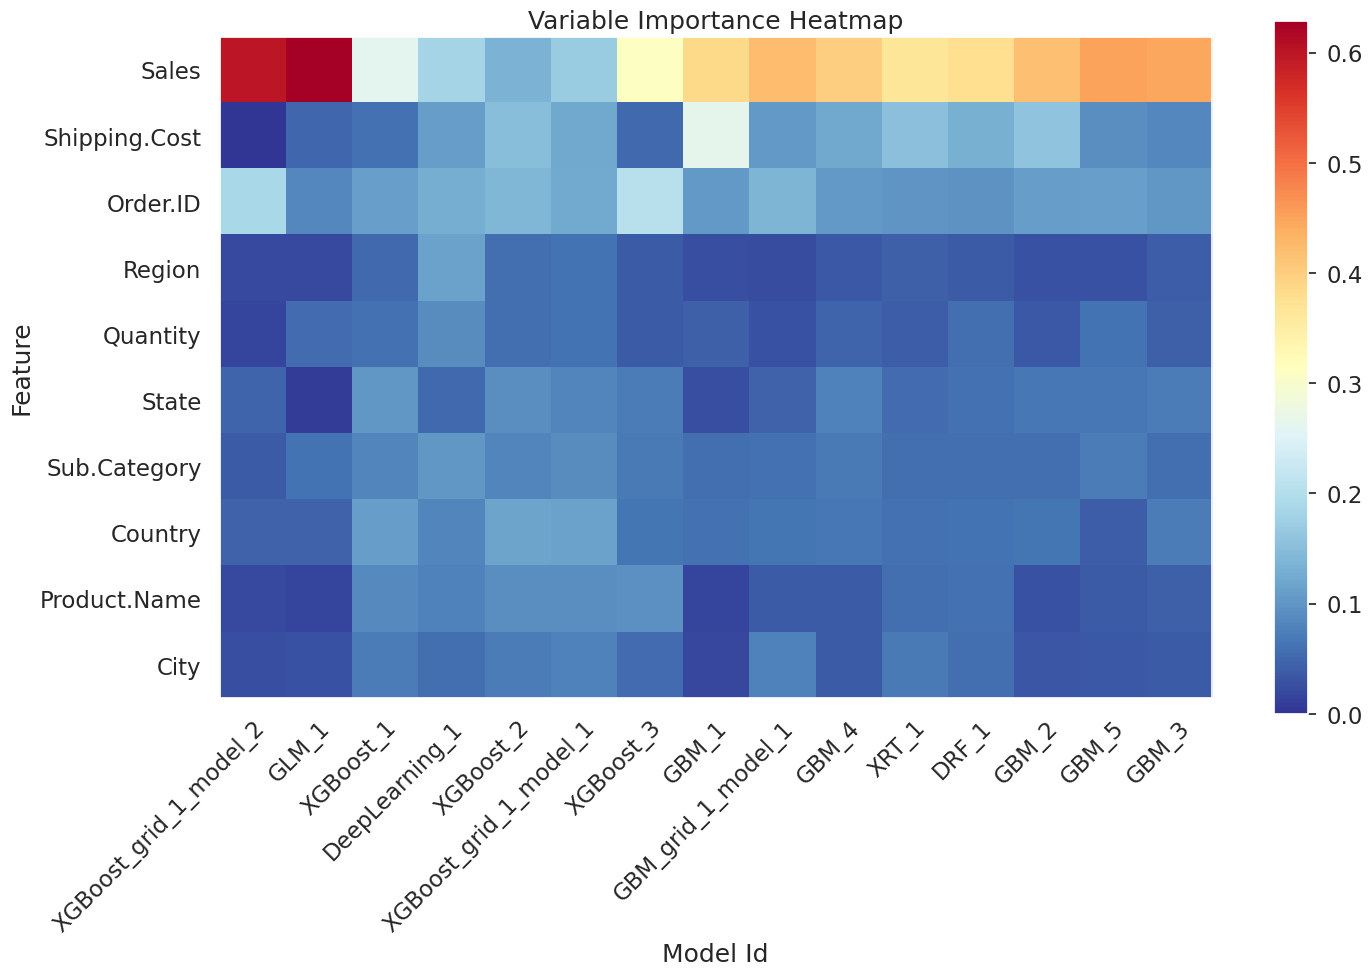

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

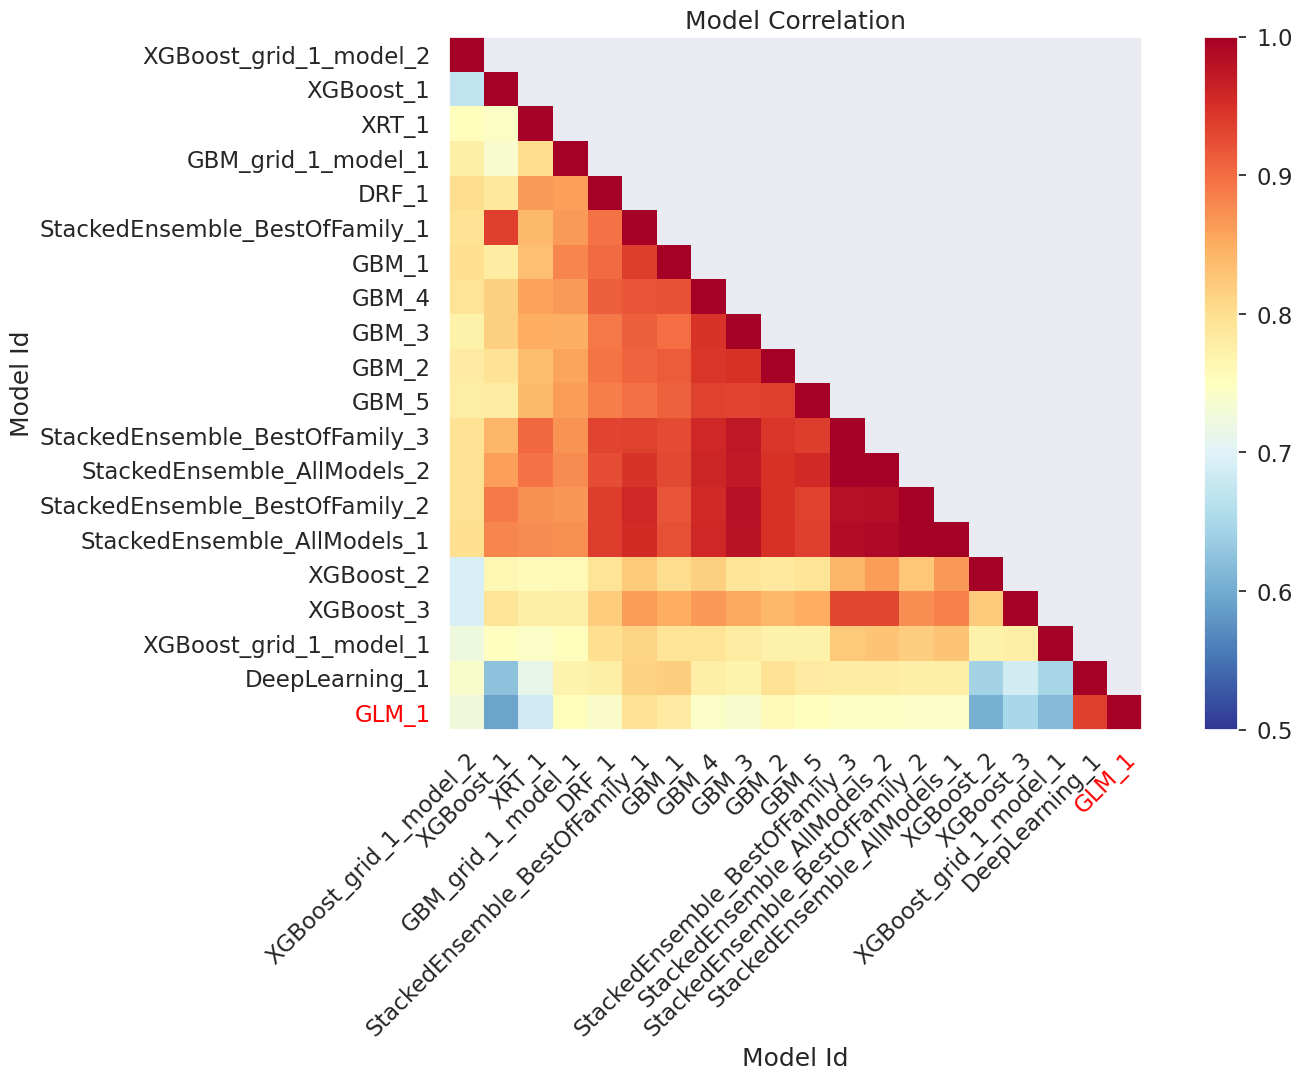

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

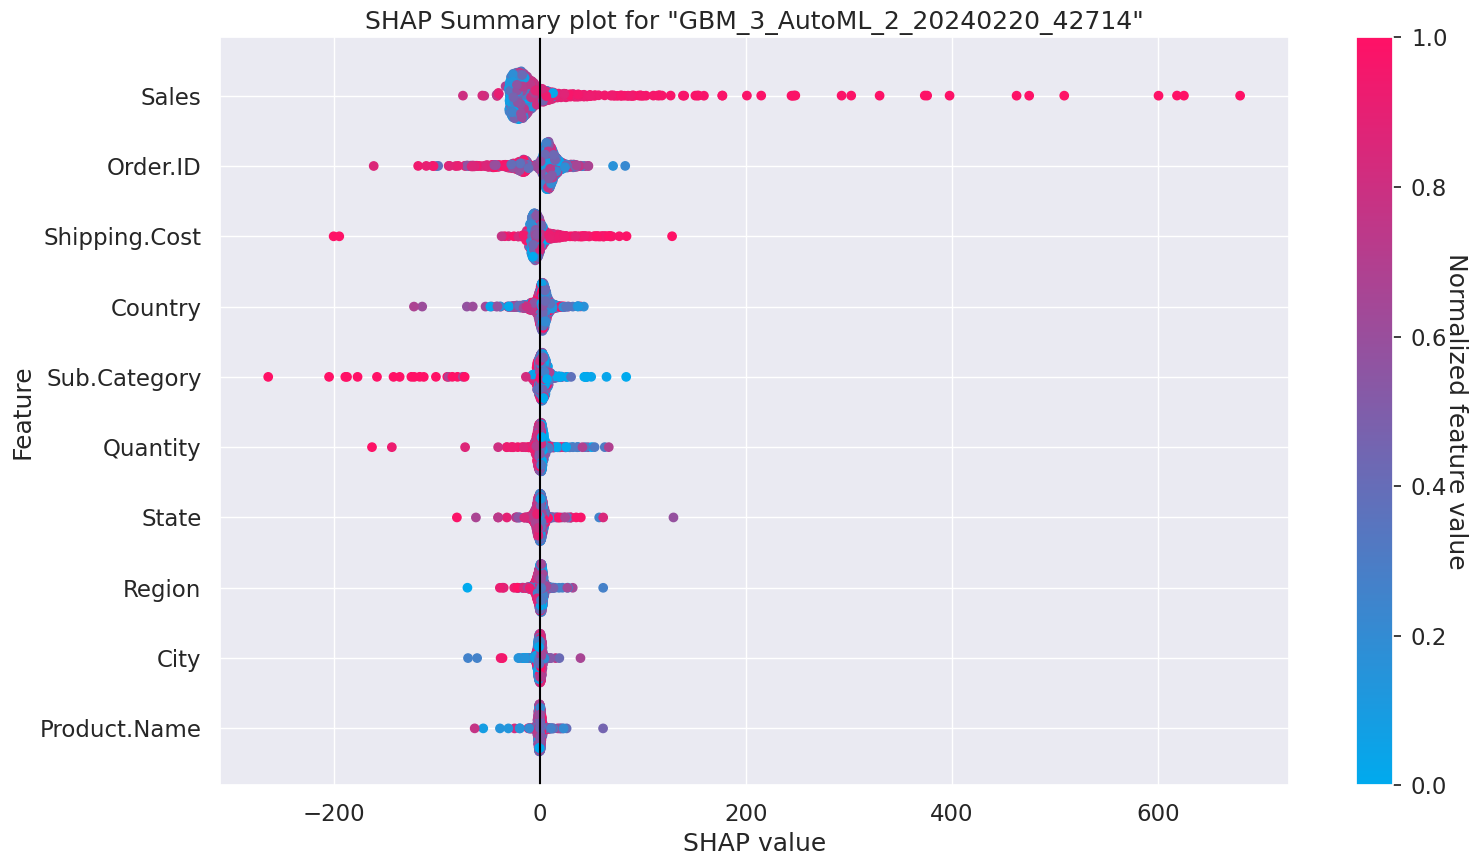

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

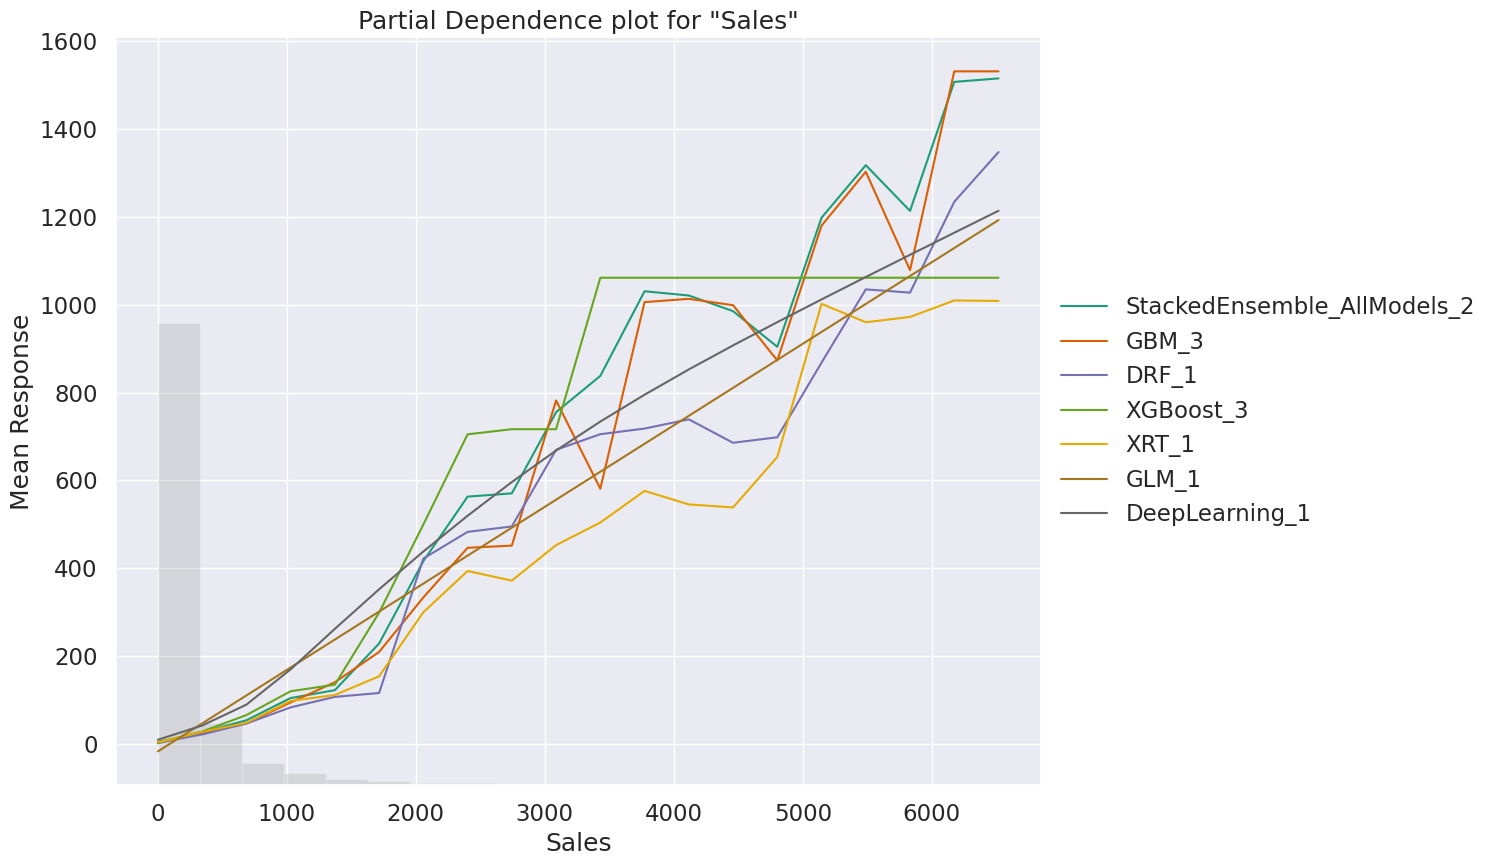

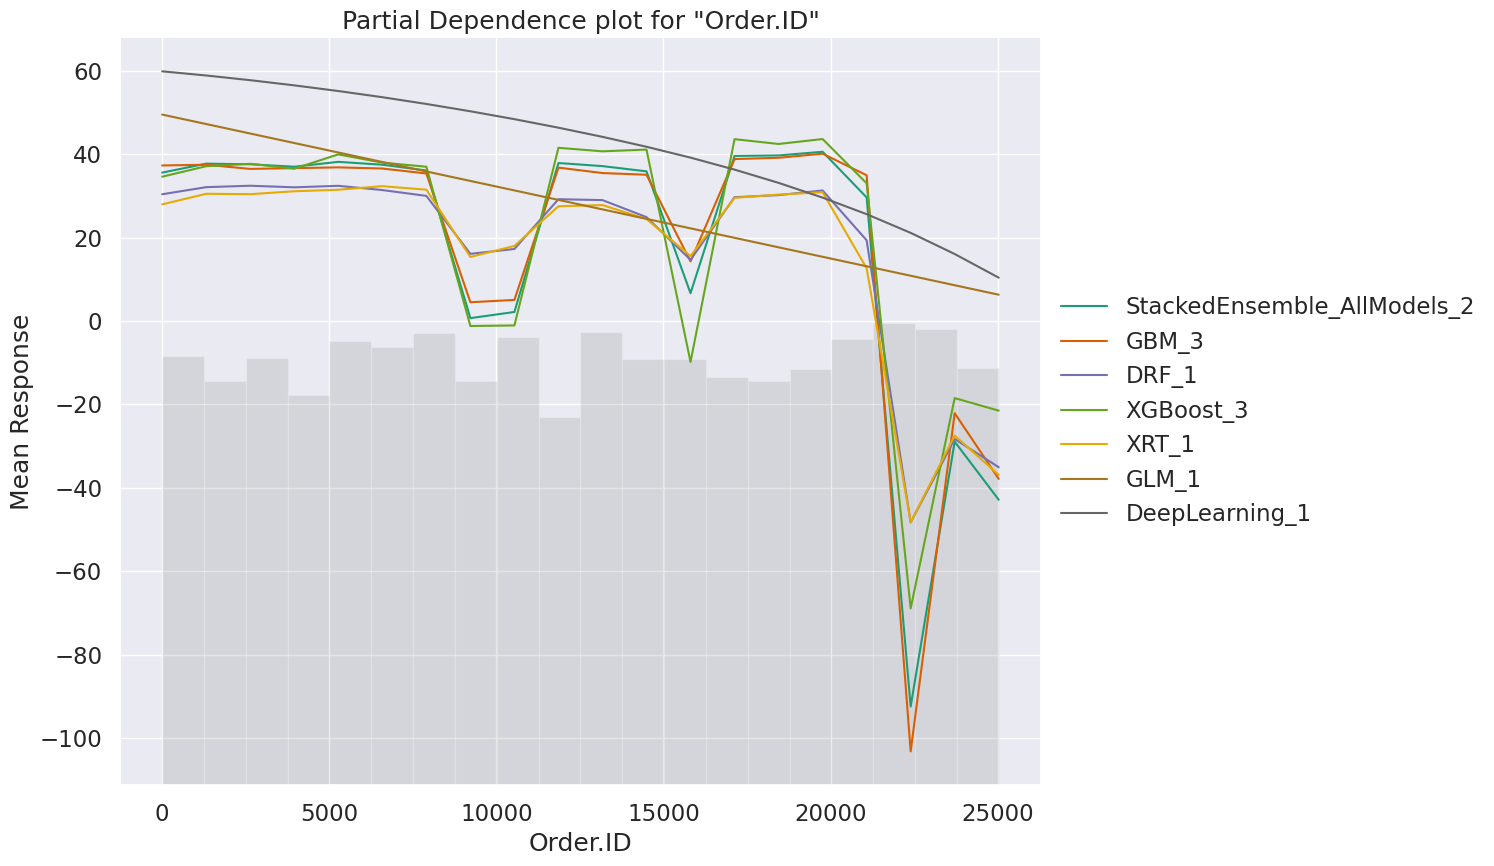

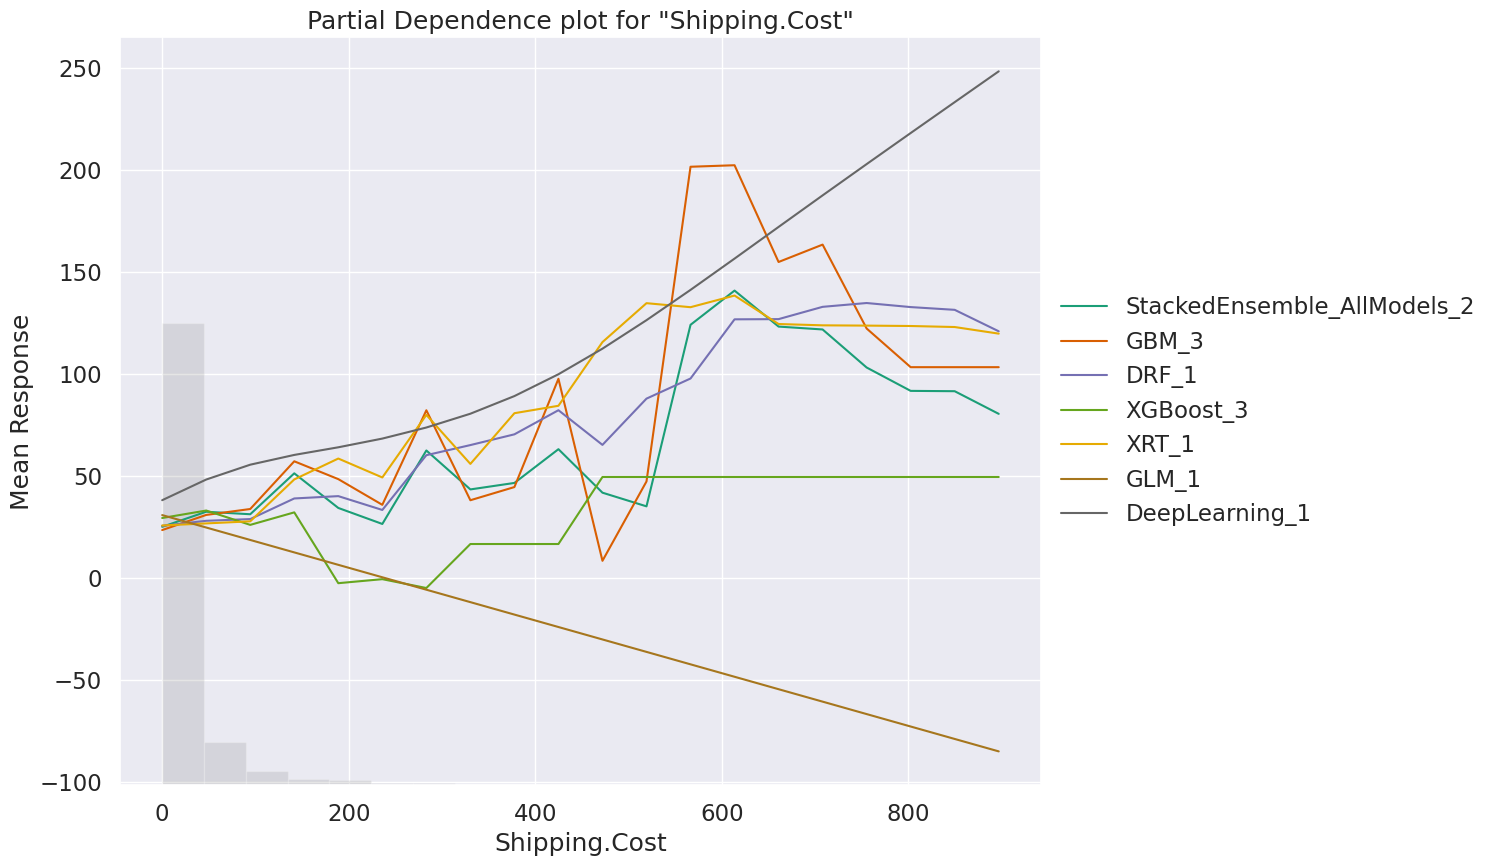

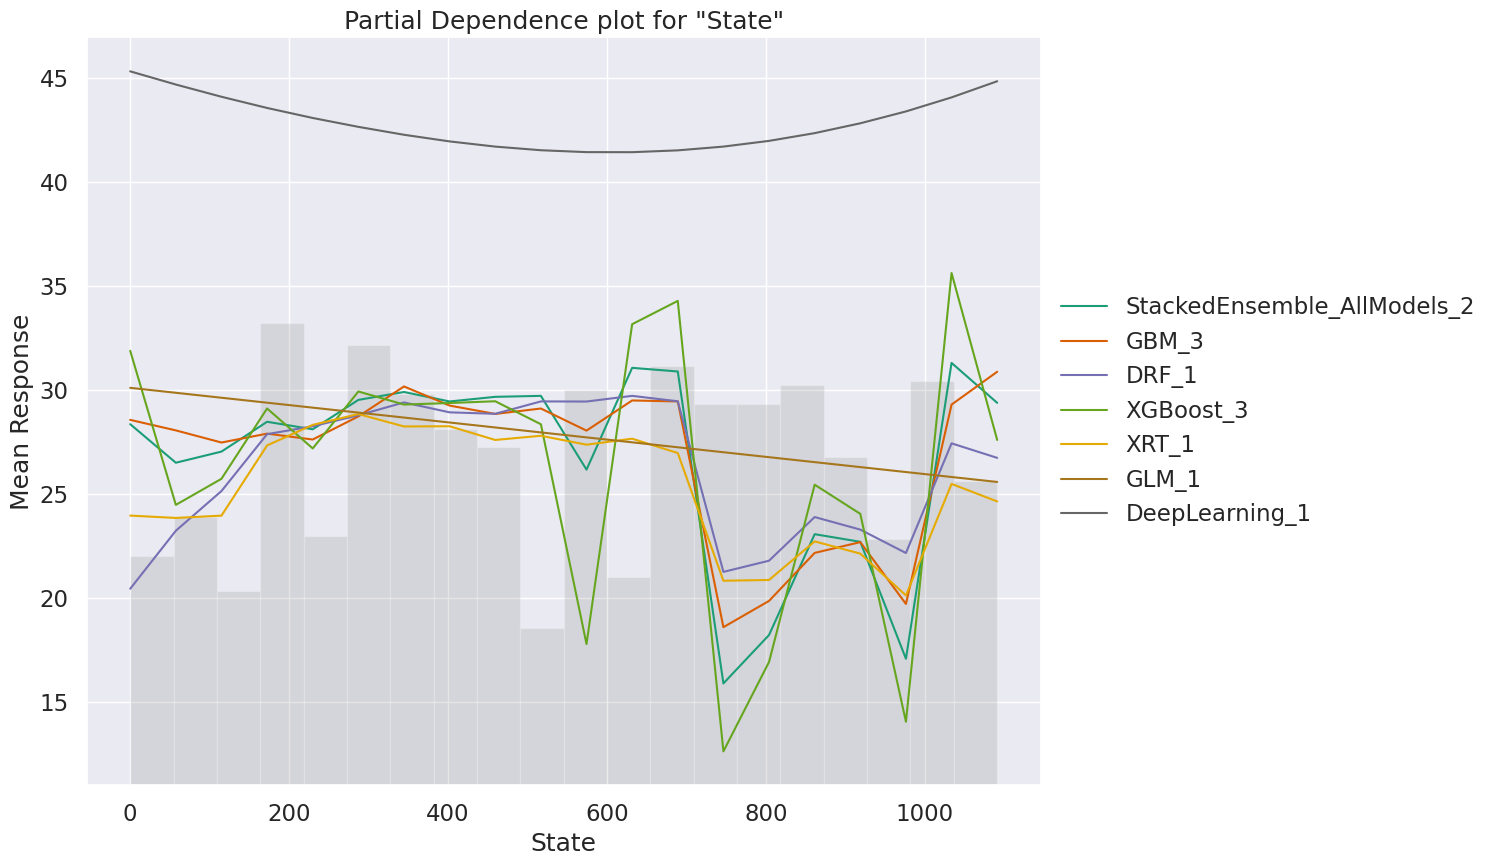

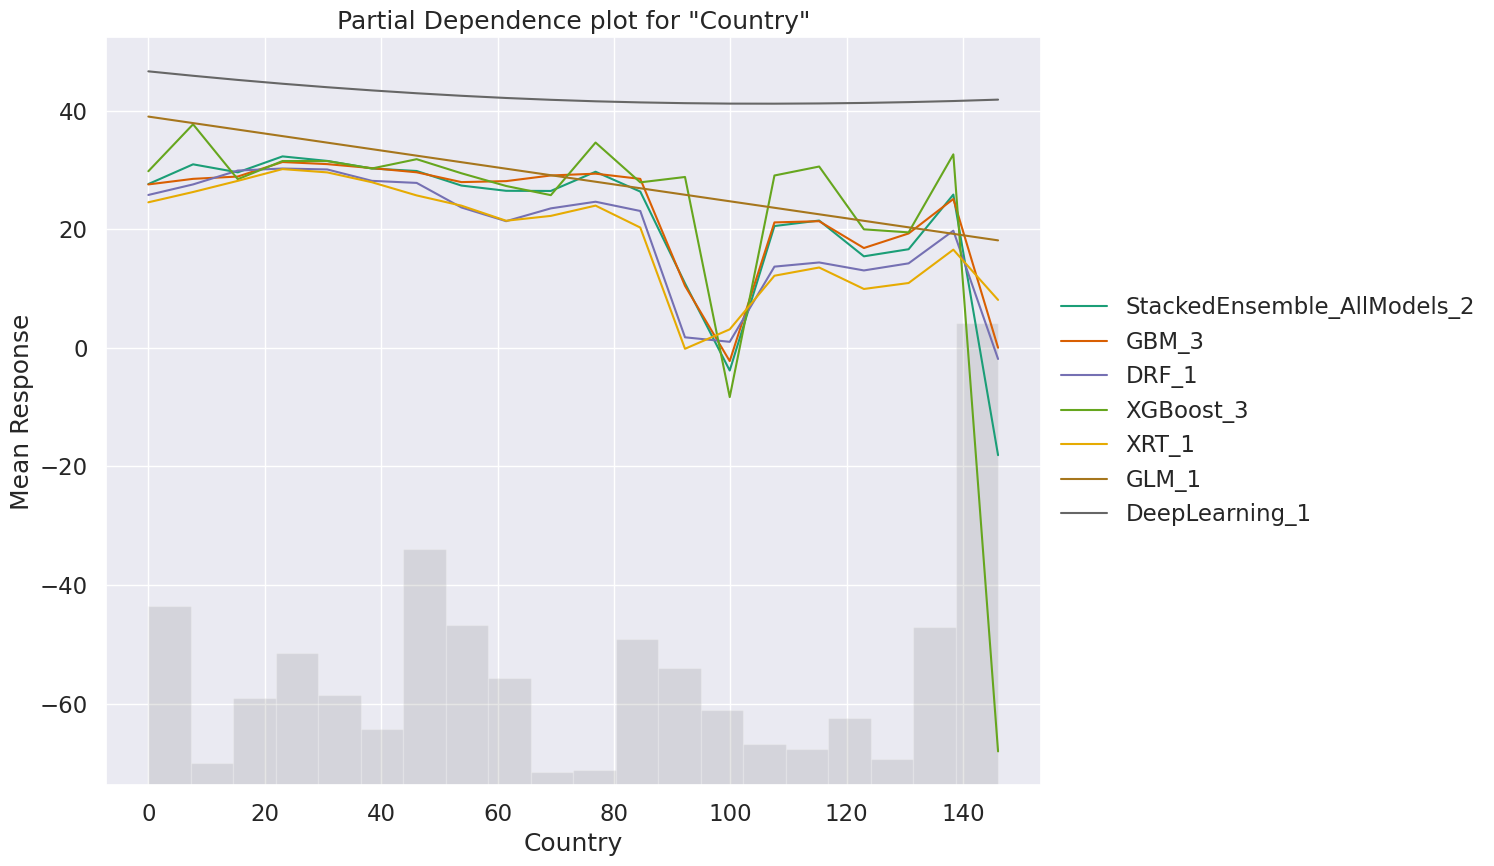

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

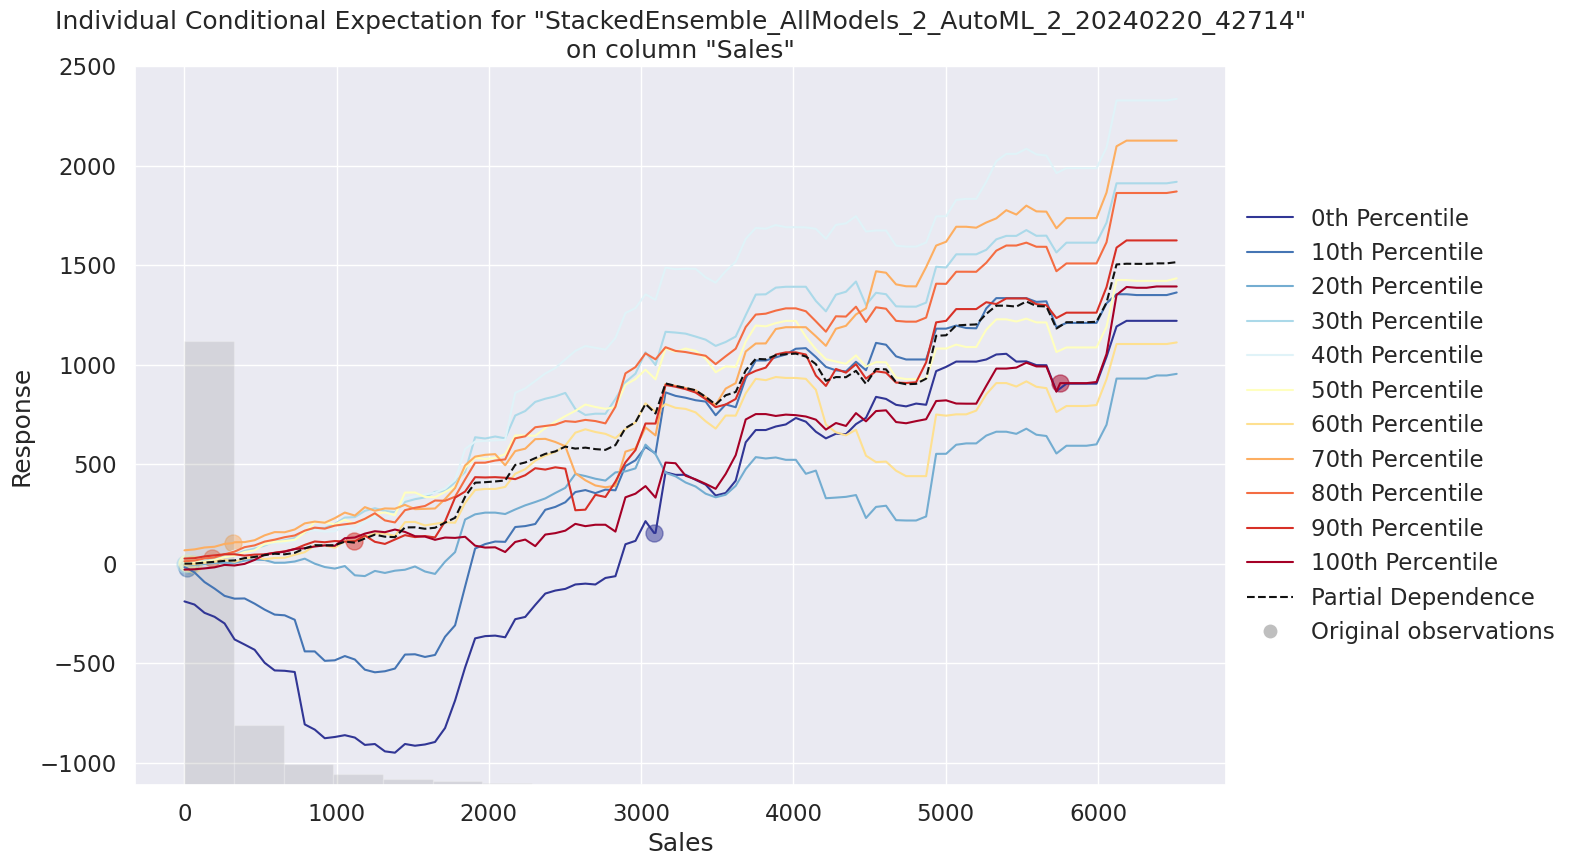

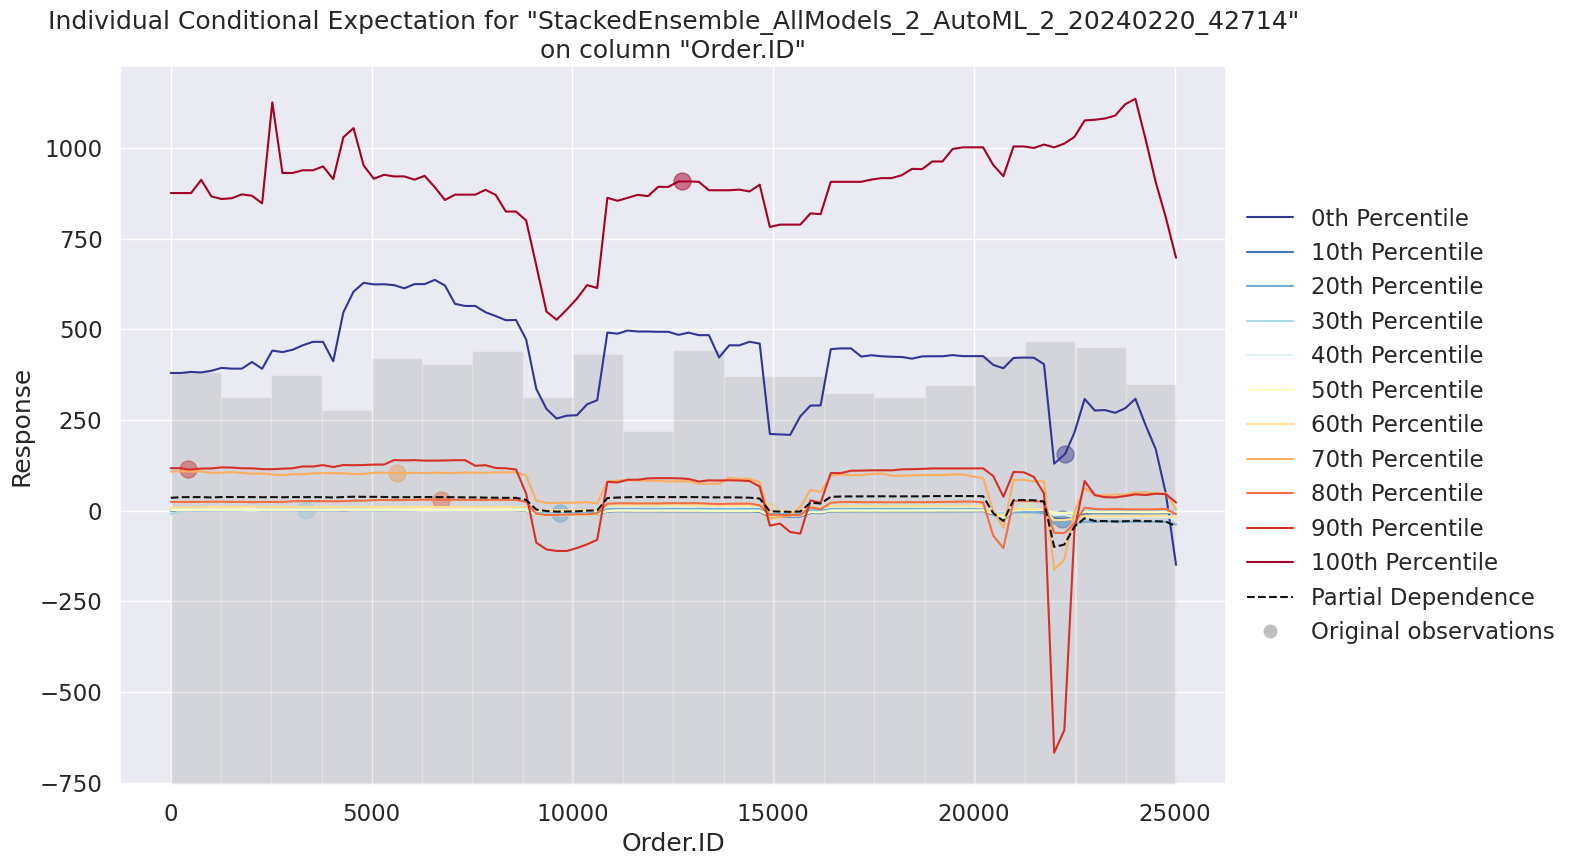

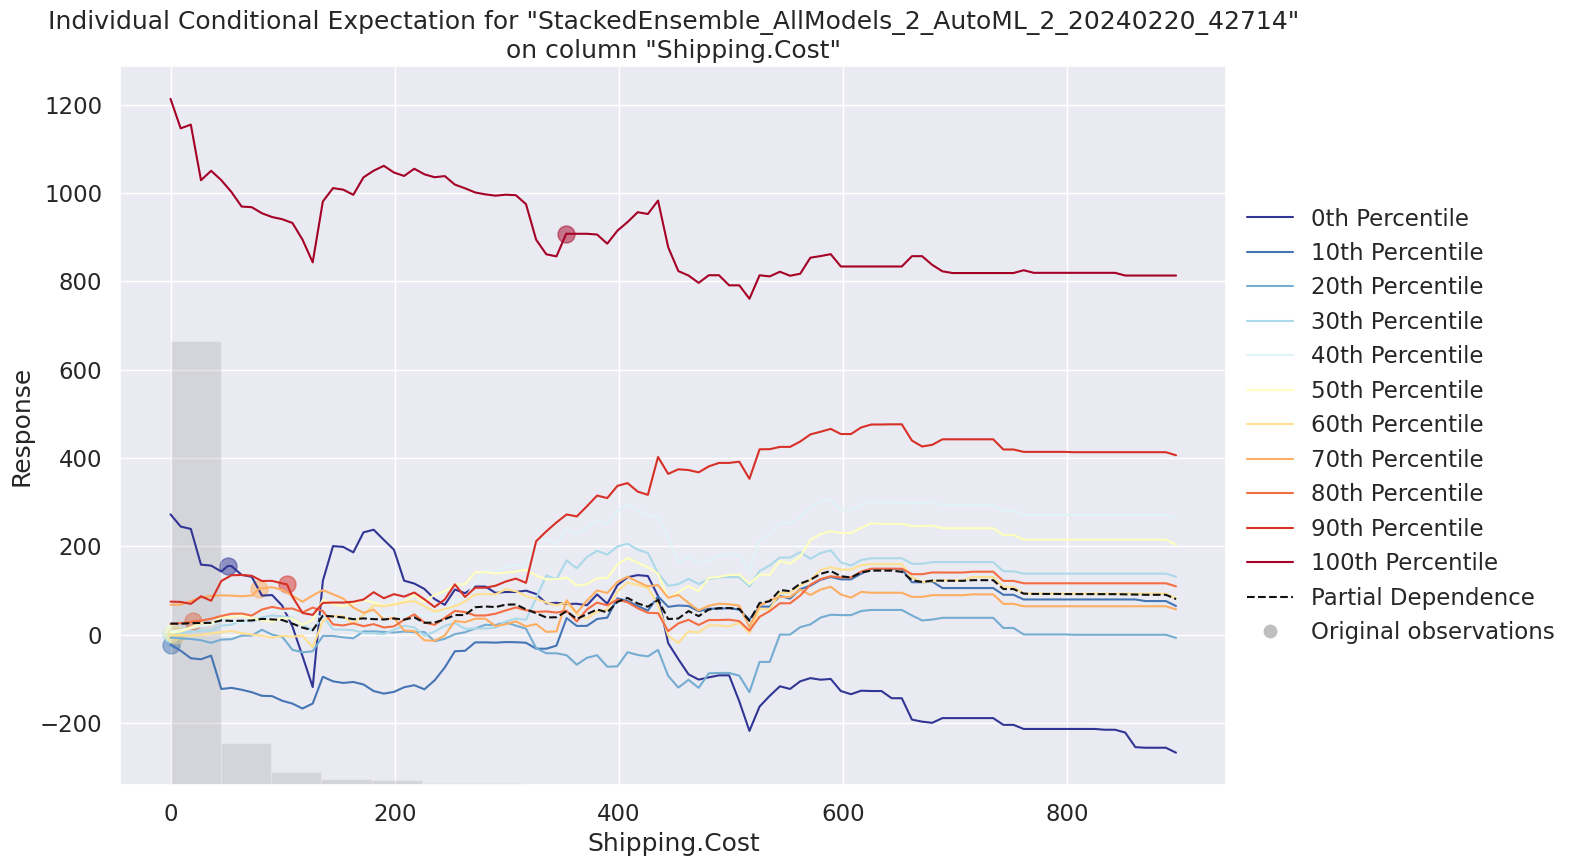

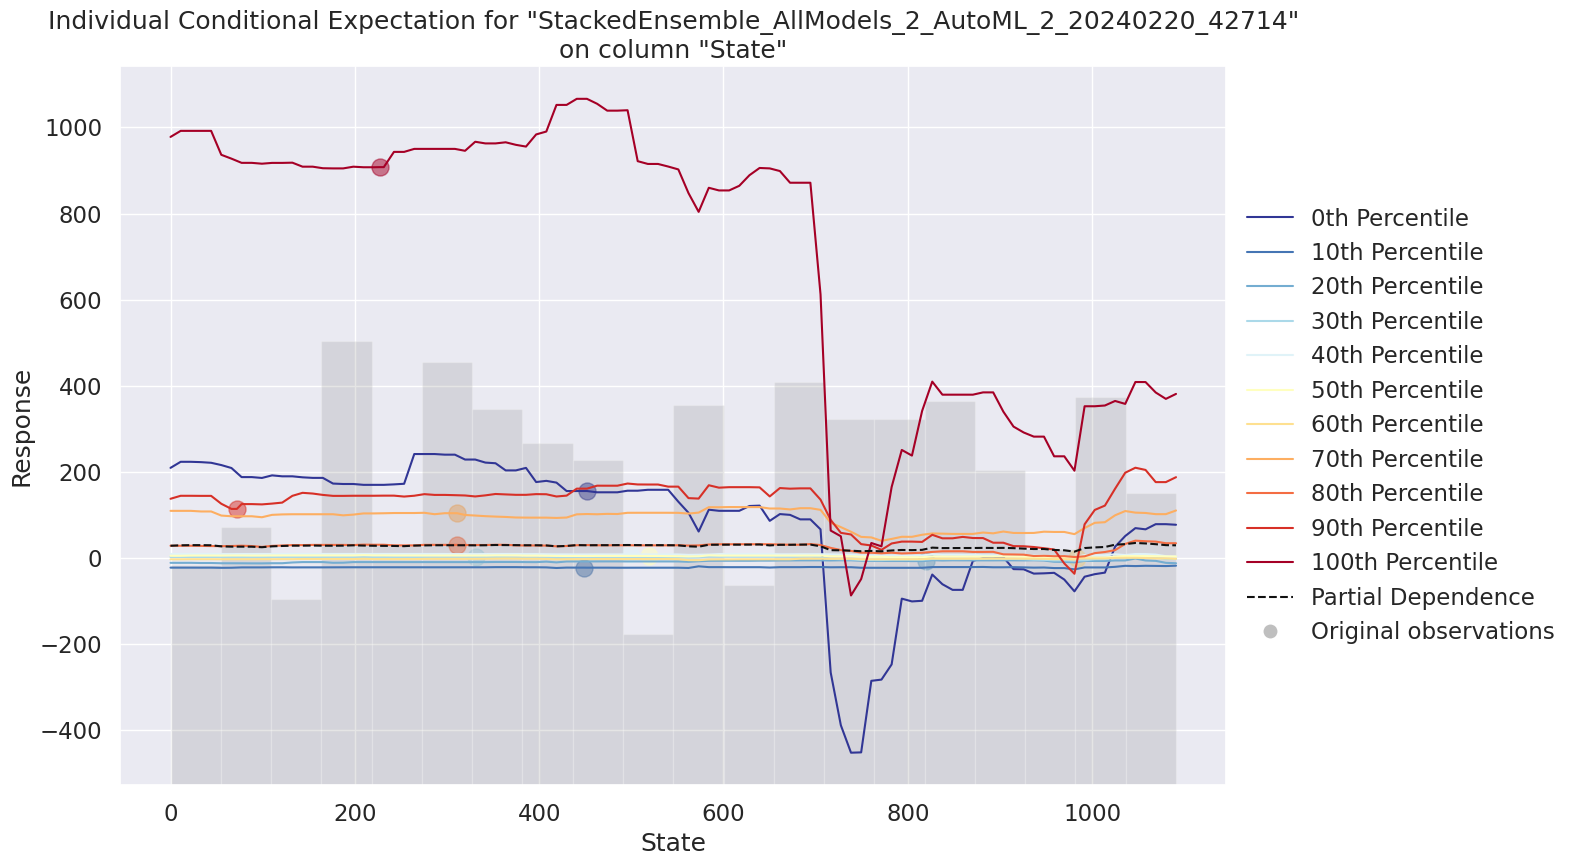

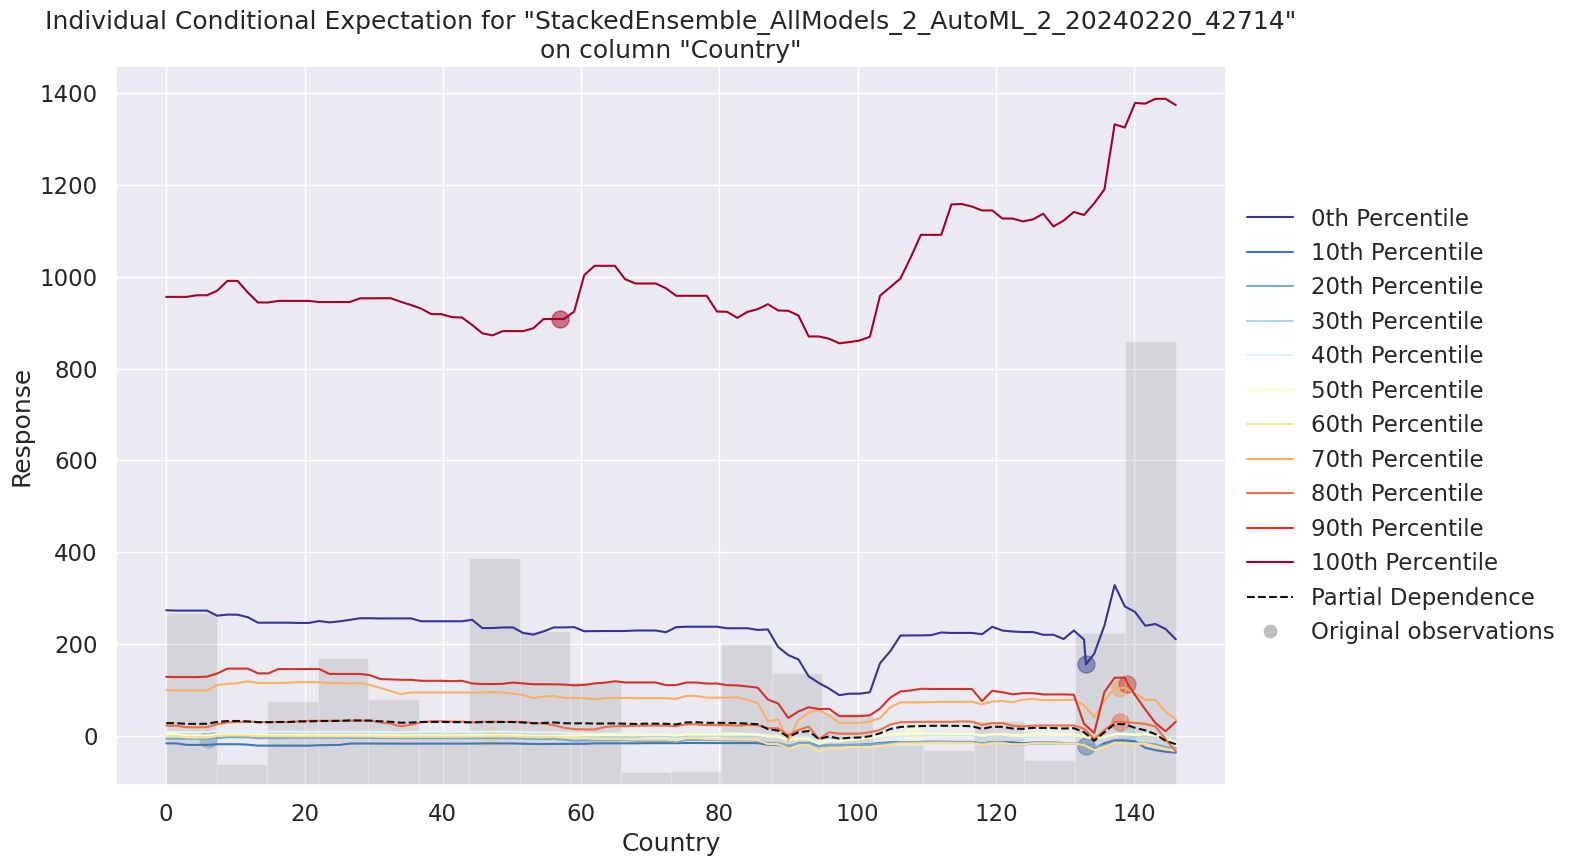

In [72]:
exa = aml2.explain(df2_test)

# Hyperparameter Tuning

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [73]:
s=df1['Profit']
t=df1.drop(['Profit'], axis=1)

In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [75]:
t_train, t_test, s_train, s_test = train_test_split(t, s, random_state=101, test_size=0.2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
mode = RandomForestRegressor()
param_vals = {'max_depth' : [200,800], 'n_estimators': [100,300], 'min_samples_split': [2,3]}
random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals, n_iter=10, scoring='accuracy', cv=5, refit=True, n_jobs=-1)

# Training and prediction
random_rf.fit(t_train, s_train)
preds = random_rf.best_estimator_.predict(t_test)

In [ ]:
random_rf.best_params_

In [ ]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# Enhanced GBM model with regularization parameters
gbm_regularized = H2OGradientBoostingEstimator(
    model_id='gbm_regularized', seed=1234, keep_cross_validation_predictions=True,
    nfolds=5, fold_assignment="stratified", balance_classes=True,

    # Regularization parameters
    learn_rate=0.01, sample_rate=0.8, max_depth=6,  ntrees=80, min_rows=8, col_sample_rate=0.8, col_sample_rate_per_tree=0.8
)

# Use .train() to build the model with features and target specified
gbm_regularized.train(x=X2, y=y2_numeric, training_frame=df2_train)

In [ ]:
# Check the model performance on test dataset
gbm_regularized.model_performance(df_test)

# Conclusion

A fundamental algorithm based on the linear regression method to predict profit is constructed. VIF, p-values and other methods are considered to ignore some of the independent variables. H2O.ai framework is used to train and test the variables of the dataset of the Global SuperStore. This gave the best model as Stacked Ensemble model described below and R^2 for train data is 84% and for test data was 74%. From the results shown it can be concluded that the proposed linear regression model can effectively analyze and predict the profit to some extent. Admittedly, the prediction accuracy is still limited at specific points, and the model still needs to be improved in further research. In further research into the corresponding models, different techniques like removing outliers and using ensemble or booster can help achieve better prediction.

Best Model Characteristics (Stacked Ensemble model created by H2O's AutoML):

    Stacking Strategy: Cross-validation
    Base Models Used: 4 out of 6 possible models
        GBM (Gradient Boosting Machine): 1 out of 1
        XGBoost: 1 out of 1
        DRF (Distributed Random Forest): 2 out of 2
        GLM (Generalized Linear Model): 0 out of 1
        Deep Learning: 0 out of 1
    Metalearner Algorithm: GLM (Generalized Linear Model)
    Metalearner Fold Assignment Scheme: Random
    Metalearner Nfolds: 5

Performance Metrics on Training Data:

    MSE (Mean Squared Error): 5574.100286678096
    RMSE (Root Mean Squared Error): 74.65989744620667
    MAE (Mean Absolute Error): 31.861646477186365
    R^2 (Coefficient of Determination): 0.8492458938064231

Performance Metrics on Cross-validation Data:

    MSE: 17683.99956992426
    RMSE: 132.98120006197968
    MAE: 43.370049578000604
    R^2: 0.44223498474562406

Performance Metrics on Test Data:

    MSE: 8035.211159032788
    RMSE: 89.63933934960022
    MAE: 33.91540995925599
    R^2: 0.731433380034149

# Assignment Q&A

### 1) Is the relationship significant?

A relationship is said to be statistically significant when the p value for the variables is less than 0.05. P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for 'Order_Date', 'Order_Priority', 'Row_ID', 'Segment', 'Ship_Date', 'Ship_Mode' and 'weeknum'  were greater than 0.05. So, it can be concluded that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.

### 2) Are any model assumptions violated?

No, none of the model assumptions are violated. For linear regression some of the assumptions are described below. These assumptions are checked earlier in the notebook.

(1)There needs to be linear relation between the independent and dependent variable.  
(2)Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.  
(3)Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.  
(4)There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.


### 3) Is there any multicollinearity in the model?

No, there are no multi-collinear features present in the model. The dataset contained various features that have multicollinearity issue, but they have been removed after looking at the correlation heatmap and the VIF values of the features earlier in the notebook.

The features having multicollinearity (which were removed from the model) are:

VIF for 'Category','Customer.ID','Customer.Name','Discount', 'Market', 'Product.ID', 'Year' and 'Market2' is greater than 10. 'Market' and 'Market2' specify the same thing. 'Product.ID', 'Customer.ID', 'Customer.Name' are the unique identifiers and adds no value to train the model. Dropping the columns = ['Category', 'Customer.ID', 'Customer.Name', 'Discount', 'Market', 'Product.ID', 'Year']


### 4) In the multivariate models are predictor variables independent of all the other predictor variables?

Yes, all the predictor variables are indpendent of each other. The variables that were dependent were removed based on the correlation matrix and heatmap and VIF described earlier. The variables removed are ['Category', 'Customer.ID', 'Customer.Name', 'Discount', 'Market', 'Product.ID', 'Year'].

### 5) In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

From the variable importance plot, the most to least important variables are displayed. These are Sales, Shipping Cost, Order.ID, Country, SubCategory, and so on.

### 6) Does the model make sense?

According to the model, the most important factor for output variable profit is Sales and Shipping Cost, which is logical and makes sense.

For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.74 which is considered good in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

### 7) Does regularization help?

Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were same in both the cases. Hence it can be concluded that for this model regularization does not help.

### 8) Which independent variables are significant?

Variables are significant when p-value is less than 0.05. The significant variables are City, Country, Order.ID, Product_name, Quantity, Region, Sales, Shipping cost, State, Sub category, Market2.

### 9) Which hyperparameters are important?

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The hyperparameters important for random forsest are param_vals = {'max_depth' : [200,800], 'n_estimators': [100,300], 'min_samples_split': [2,3]}.

For the gradient boosting regressor the important hyperparameters are learning rate, number of trees, max trees.
